In [1]:
%load_ext autoreload
%autoreload 2
import geopandas as gpd
import pandas as pd
import ast
import shapely
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import LineString
import scipy as sc
import re
from tqdm import tqdm


from sklearn.cluster import KMeans
from sklearn.metrics import r2_score

directory = '/scratch/6256481/'

import sys
sys.path.insert(0, directory + f'python/py_code/')
from sklearn.neighbors import NearestNeighbors


from open_files import open_all_files_multiproces, alternative_entrenchment_ratio


import glob
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib as mpl

# from main import main

from support import create_custom_cmap


# Get path to files

In [2]:
sourceFiles  = np.sort(glob.glob(directory + 'input/SWOT_vector/*.shp'))
nodeFiles    = np.sort(glob.glob(directory + 'results/new_segments/node/*.shp'))
vectorFiles  = np.sort(glob.glob(directory + 'results/new_segments/vector/*.shp'))
files5       = np.sort(glob.glob(directory + 'results/all/*_5_5_0.csv'))
files10      = np.sort(glob.glob(directory + 'results/all/*10_5_0.csv'))
files15      = np.sort(glob.glob(directory + 'results/all/*15_5_0.csv'))
files25      = np.sort(glob.glob(directory + 'results/all/*25_5_0.csv'))
files30      = np.sort(glob.glob(directory + 'results/all/*30_5_0.csv'))
files60      = np.sort(glob.glob(directory + 'results/all/*60_5_0.csv'))

In [3]:
files = glob.glob(directory + 'input/SWOT_vector/*.shp')
files = np.sort(files)

F = glob.glob(directory + 'input/SWOT_vector/*.shp')
for f in range(len(F)):
    D = gpd.read_file(F[f])
    D = D[(D['type'] == 1) & (D.lakeflag == 0)]

    cont = F[f][-29:-27]
    cont_reg = F[f][-10:-8]
    D.loc[:, 'File'] = f'{cont}_{cont_reg}'
    
    if f == 0:
        dfInput = D.copy()
    else:
        dfInput = pd.concat([dfInput, D])

dfInput = dfInput.groupby('File', as_index=False).size()
dfInput = dfInput.sort_values('File')
sizeInput = (-dfInput['size'].values).argsort()
files = files[sizeInput]
# files

In [4]:
FF = glob.glob(directory + 'results/all/*as*43*25*')
T = pd.read_csv(FF[0])
T.shape[0]

9813

In [5]:
TT = gpd.read_file(files[2])
TT.shape[0]

19839

In [3]:
def compare_input_to_created(inputFiles, outputFiles, S):
    innNames = [F[-29:-27] +'_'+ F[-10:-8] for F in inputFiles]
    outNames = [F[S[0]:S[1]] for F in outputFiles]
    # print(outNames)
    notCreated = [x for x in innNames if x not in outNames]
    created    = [x for x in innNames if x in outNames]
    return notCreated, created

NC10, C10 = compare_input_to_created(sourceFiles, files10, [-16, -11])
NC15, C15 = compare_input_to_created(sourceFiles, files15, [-16, -11])
NC25, C25 = compare_input_to_created(sourceFiles, files25, [-16, -11])
NC30, C30 = compare_input_to_created(sourceFiles, files30, [-16, -11])
NC60, C60 = compare_input_to_created(sourceFiles, files60, [-16, -11])


print('10x: ', NC10)
print('15x: ', NC15)
print('30x: ', NC25)
print('25x: ', NC30)
print('60x: ', NC60)


10x:  []
15x:  []
30x:  ['af_11', 'af_12', 'af_13', 'af_14', 'af_17', 'af_18', 'as_31', 'as_32', 'as_33', 'as_34', 'as_35', 'as_42', 'as_44', 'as_45', 'as_46', 'eu_22', 'eu_23', 'eu_24', 'eu_26', 'eu_28', 'eu_29', 'na_71', 'na_72', 'na_74', 'na_75', 'na_81', 'na_82', 'oc_51', 'oc_52', 'oc_53', 'oc_56', 'sa_61', 'sa_62', 'sa_63', 'sa_64']
25x:  ['af_13', 'as_35', 'as_43', 'as_45', 'na_74', 'oc_53']
60x:  ['af_13', 'af_14', 'as_35', 'as_43', 'as_45', 'sa_62']


# open Files

In [38]:
projection       = 'EPSG:3857'



### Open all values

In [ ]:

# D = open_mg_file(files[0], ['geometry'], projection)
# listColumns  = ['apex5_0', 'ang5_0', 'outSlope', 'innSlope', 'CDists']
listColumns  = ['apex5_0', 'ang5_0', 'outSlope', 'innSlope', 'outPR',	'innPR', 'CDists', 'bendWidths', 'bendWidthM']
pointColumns = ['infP5_0', 'apexP5_0']
# nestedLists  = ['CDists']
nestedLists  = ['outPR', 'innPR', 'CDists']
combMean     = [['outSlope', 'innSlope']]
combMeanName = ['mInnOutSlope']

In [40]:
# ###### import GLIM
GL = gpd.read_file(directory + 'input/GLIM.gdb')
GL = GL.to_crs(projection)
GL['GLGeometry'] = GL.geometry


In [ ]:
# singleFile = -4
# for f in files25[singleFile:singleFile + 1]:
for f in files25[0:4]:
    print(f)
    dfAll = open_all_files_multiproces(True, f,[-16, -11], ['geometry'], listColumns, nestedLists, combMean, combMeanName, directory, projection, GL, 25, 3 )


/scratch/6256481/results/all/af_15_25_5_0.csv


NameError: name 'listColumns' is not defined

In [4]:
# R = [35301200581, 35301200641, 35301202351, 35301202461, 35301203241,
#        35301203401, 35301203711, 35301203721, 35301204761, 35301204801,
#        35301205061, 35301205181, 35601200431, 35601200441, 35601500061,
#        35601500061, 35602600401]
# R = [13121001691]
# R = [11410000021, 11430000051, 11430000011]
# R = [13224201521, 13370400101]
# R = [21406500031, 21404000311, 21404000331] #EU21 U-dalen
# # R = [44547900121, 44547900111] #AS44 V-dalen

# dfP = dfAll[0].copy()
# # R = dfAll.iloc[49:50].reach_id
# # R = dfAll.iloc[0:30].reach_id
# for r in R:
#     depthWidthRelation = (1/28)
#     print(r)
#     for depths in [2]:
        
#         I = dfP[dfP.reach_id == r].index[0]
#         row = dfP.loc[I]
#         d = row.CDists
#         ipr = row.innPR
#         opr = row.outPR
#         widths = row.bendWidths
        
#         T = depthWidthRelation * depths

#         er, erMax, erMin, erSTD, val, valMax, valMin, valSTD, ERTot, valTot, ers1, ers2, erss,\
#             SO, SI, SCO, SCI = alternative_entrenchment_ratio(ipr, opr, d,widths, T, plot = True, plotRow = row)
#         # print('\t', er, erMin, row.ER, row.ERMin)
#         # print(er, erMax, erMin, erSTD, val, valMax, valMin, valSTD, ERTot, valTot, ers1, ers2, erss)
#         print(SO, SI, SCO, SCI)
#         # print(SOutList)
#         # print(erss)

# Open single value files

In [20]:
def open_apex_val_files(cross_distance, conf_height):
    singleValFiles = np.sort(glob.glob(directory + f'results/single_values/*{cross_distance}_ER_{conf_height}*.csv'))
    singleValFiles = singleValFiles[0:3]
    for i, f in tqdm(enumerate(singleValFiles), total = len(singleValFiles)):
        df = pd.read_csv(f)
        if i == 0:
            dfV = df.copy()
        else:
            dfV = pd.concat([dfV, df])

    dfV['CSlope'] = (dfV.SInn + dfV.SOut) /2
    dfV['EROutW']  = dfV['ERSide1'] / dfV['width']
    dfV['ERInnW']  = dfV['ERSide2'] / dfV['width']
    dfV['ERW'] = dfV['VW'] / dfV['width']
    return dfV

In [21]:

cross_distance = 25
conf_height = 3
dfER3 = open_apex_val_files(cross_distance, conf_height)


  0%|          | 0/3 [00:00<?, ?it/s]

100%|██████████| 3/3 [00:00<00:00,  3.80it/s]


# Check NaN rows

In [ ]:
# check NaN from orthogonals
# check nan bendLines
# check nan inflection points
# check complete nan --> length --> is this distinguishable from inflection NaN --> check length and width


In [34]:
dfP = dfER3.copy()

A = dfP[(dfP.ER.isna()) & (~dfP.apexP.isna())]
A = A[['reach_id', 'apexID', 'apexNumber', 'apexP', 'SSin', 'ER', 'bendLine', 'File']]
A

reach_id         apexID  apexNumber  \
232   15160100051  15160100051_1         1.0   
233   15160100051  15160100051_2         2.0   
234   15160100051  15160100051_3         3.0   
235   15160100051  15160100051_4         4.0   
236   15160100051  15160100051_5         5.0   
...           ...            ...         ...   
1777  36102700241            NaN         NaN   
1843  36102900051            NaN         NaN   
1952  36102900171            NaN         NaN   
2127  36102900361            NaN         NaN   
2128  36102900361            NaN         NaN   

                                              apexP      SSin  ER  \
232   POINT (-903351.3107343904 3917648.0218291488)  1.073654 NaN   
233   POINT (-903531.8667819162 3915596.4431129107)  1.552245 NaN   
234   POINT (-904421.1992010407 3917046.7432106356)  1.741055 NaN   
235    POINT (-904989.6187205857 3916281.932001435)  1.048511 NaN   
236   POINT (-906213.9770846451 3915879.9820252666)  0.874193 NaN   
...                                             ...       ...  ..   
1777   POINT (10101841.162376678 6328730.974910896)  0.851656 NaN   
1843    POINT (10066267.048001828 6287281.17506273)  0.739683 NaN   
1952    POINT (9922037.80117529 6283099.6954550985)  1.173493 NaN   
2127     POINT (9816906.105522905 6227123.22350034)  1.349759 NaN   
2128    POINT (9817328.260461377 6227228.274060048)  1.149932 NaN   

                                               bendLine   File  
232   LINESTRING (582285.2201403505 3670288.28727281...  af_15  
233   LINESTRING (582600.7071353886 3669828.87689294...  af_15  
234   LINESTRING (581828.1990784751 3668922.13298075...  af_15  
235   LINESTRING (581121.9679785096 3669396.65994345...  af_15  
236   LINESTRING (580834.721536006 3668975.410652463...  af_15  
...                                                 ...    ...  
1777  LINESTRING (336659.20060524315 5465470.7434382...  as_36  
1843  LINESTRING (312003.0151355229 5439280.73405554...  as_36  
1952  LINESTRING (658315.0957041905 5436117.85918934...  as_36  
2127  LINESTRING (587415.9181884364 5396642.11628230...  as_36  
2128  LINESTRING (587424.3431677797 5396796.90722268...  as_36  

[398 rows x 8 columns]

# Open input files for check NaN rows

In [9]:
F = glob.glob(directory + 'input/SWOT_vector/*.shp')
for f in range(len(F)):
    D = gpd.read_file(F[f])
    D = D[(D['type'] == 1) & (D.lakeflag == 0)]

    cont = F[f][-29:-27]
    cont_reg = F[f][-10:-8]
    D.loc[:, 'File'] = f'{cont}_{cont_reg}'
    
    if f == 0:
        dfInput = D.copy()
    else:
        dfInput = pd.concat([dfInput, D])
    


In [ ]:
F = glob.glob(directory + 'results/new_segments/vector/*.shp')
for f in range(len(F)):
    D = gpd.read_file(F[f])

    D.loc[:, 'File'] = F[f][-29:-24]
    if f == 0:
        dfNS = D.copy()
    else:
        dfNS = pd.concat([dfNS, D])
    


In [10]:
print(f'Number of tiles: {len(dfT.File.unique())}')
print(f'Number of reaches: {dfT.shape[0]}')

Number of tiles: 57
Number of reaches: 128153


# Analyse Confiment slopes

## Distribution Figures

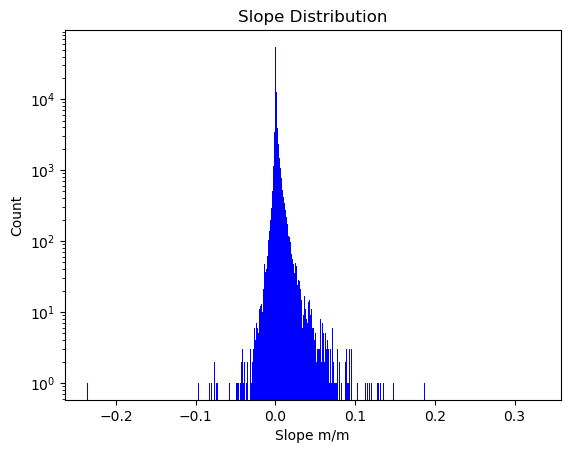

In [20]:
plt.hist(dfT.lineSlope, color = 'blue', bins = 1000)
plt.yscale('log')
plt.title('Slope Distribution')
plt.xlabel('Slope m/m')
plt.ylabel('Count')
plt.savefig(directory + 'results/figures/dist_lineslope.png')
plt.show()

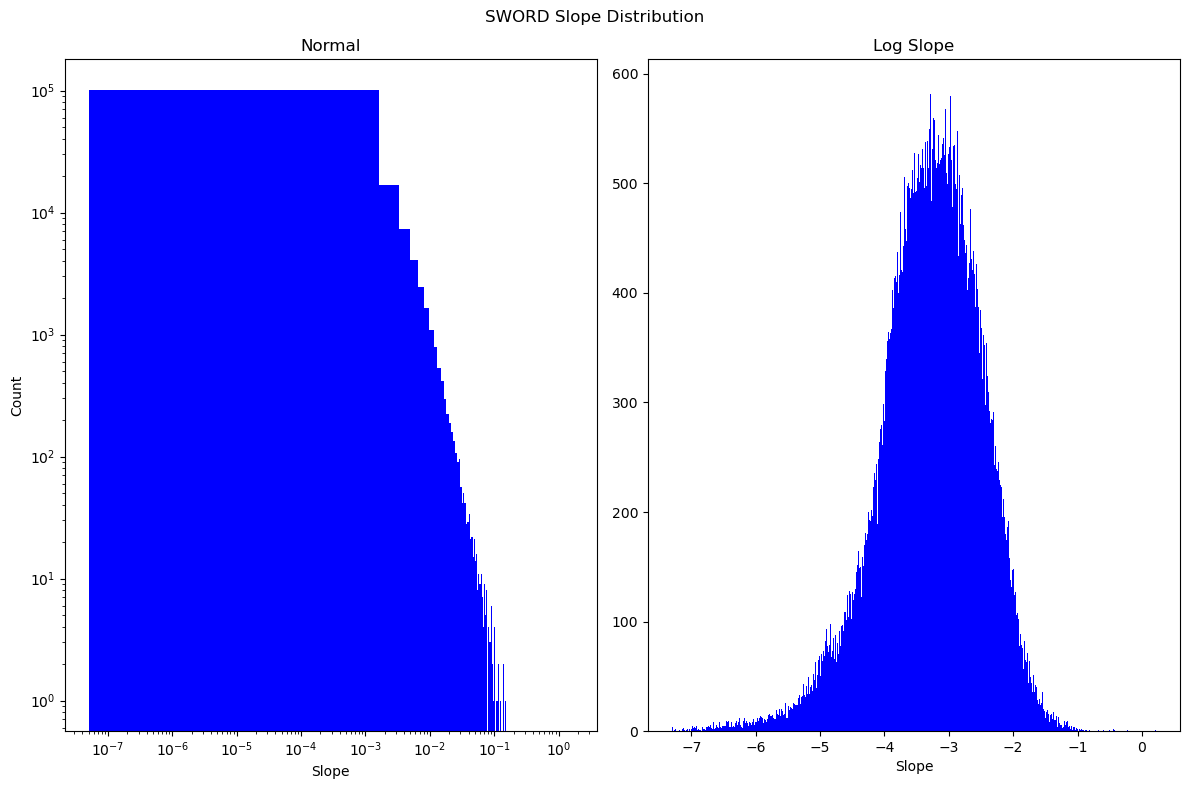

In [86]:
dfP = dfT.copy()
dfP = dfP[(dfP.mSlope > 0.00000005)]
dfP['logSlope'] = np.log10(dfP['mSlope'])

f, ax = plt.subplots(ncols = 2, figsize = [12,8])

ax[0].hist(dfP.mSlope,color = 'blue', bins = 1000)
ax[0].set_yscale('log')
ax[0].set_xscale('log')
ax[0].set_title('Normal')
ax[0].set_xlabel('Slope')
ax[0].set_ylabel('Count')



ax[1].hist(dfP.logSlope,color = 'blue', bins = 1000)
ax[1].set_title('Log Slope')
ax[1].set_xlabel('Slope')

f.suptitle('SWORD Slope Distribution')
# plt.xlabel('Slope m/m')
# plt.ylabel('Count')
plt.savefig(directory + 'results/figures/dist_SWORD_slope.png')
plt.tight_layout()
plt.show()

6783
6783
6783


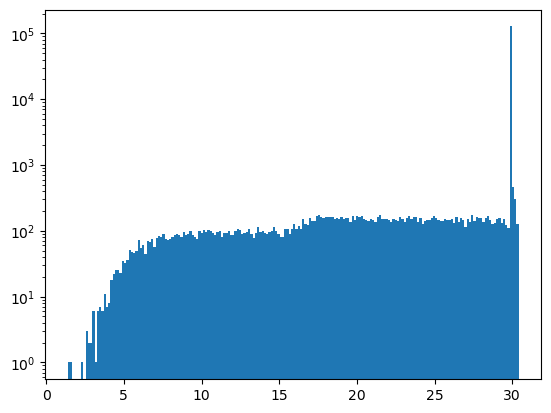

In [18]:
print(dfP[dfP['ERMax'].isna()].shape[0])
print(dfP[dfP['ER'].isna()].shape[0])
print(dfP[dfP['ERMin'].isna()].shape[0])

plt.hist(dfP.ERMax, bins = 200)
plt.yscale('log')

In [31]:
dfER3

Unnamed: 0     reach_id         ER           VW          BW     ERSide1  \
0              0  11410000021  29.925000  3584.587500  119.785714         NaN   
1              1  11410000021  29.925000  3174.187500  106.071429         NaN   
2              2  11410000021  29.925000  3230.539773  107.954545         NaN   
3              3  11410000021  29.925000  3293.887500  110.071429         NaN   
4              4  11410000021  29.925000  3168.725000  105.888889         NaN   
...          ...          ...        ...          ...         ...         ...   
9142        9142  67209600121   7.420669   328.870548   44.318182   22.159091   
9143        9143  67209600121   4.672970   203.975133   43.650000  182.150133   
9144        9144  67209600121   8.128425   353.586500   43.500000   21.750000   
9145        9145  67209600121   2.902241   118.084941   40.687500   97.741191   
9146        9146  67209600121   3.212680   130.916719   40.750000   79.885333   

         ERSide2   ERSS       SInn       SOut     SCOut     SCInn   File  \
0            NaN    NaN   0.214809   0.026985  1.629594  1.360340  af_11   
1            NaN    NaN   0.042075   0.195415  1.428254  1.597898  af_11   
2            NaN    NaN  -0.021795   0.132862  1.550204  1.875160  af_11   
3            NaN    NaN   0.085895   0.006996  1.844010  1.690639  af_11   
4            NaN    NaN   0.037707   0.198771  1.381200  1.741119  af_11   
...          ...    ...        ...        ...       ...       ...    ...   
9142  306.711457  False   0.948630  90.000000  1.000000  1.359341  sa_67   
9143   21.825000  False  90.000000   1.648453  1.462381  1.000000  sa_67   
9144  331.836500  False   0.855115  90.000000  1.000000  1.199411  sa_67   
9145   20.343750  False  90.000000   3.141354  1.855379  1.000000  sa_67   
9146   51.031386  False   7.606501   4.057643  1.884583  1.613300  sa_67   

         CSlope  
0      0.120897  
1      0.118745  
2      0.055533  
3      0.046445  
4      0.118239  
...         ...  
9142  45.474315  
9143  45.824226  
9144  45.427557  
9145  46.570677  
9146   5.832072  

[2627986 rows x 14 columns]

AttributeError: 'DataFrame' object has no attribute 'ERMin'

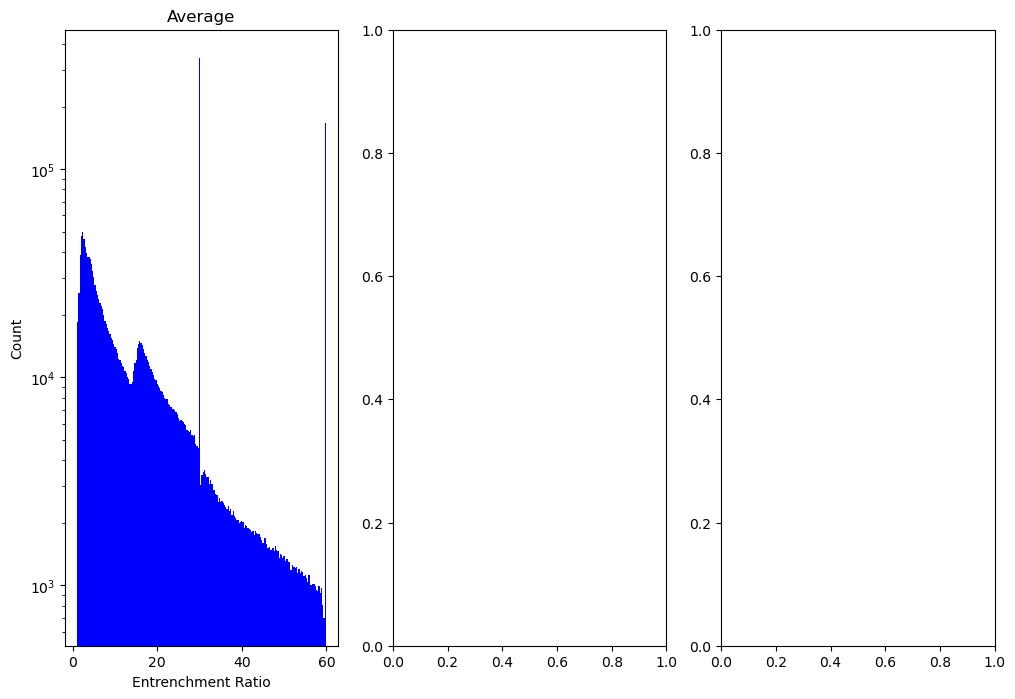

In [30]:
# dfP = dfT.copy()
dfP = dfER3.copy()
# dfP = dfP[(dfP.ER < 29.9)]


f, ax = plt.subplots(ncols = 3, figsize = [12,8])

ax[0].hist(dfP.ER,color = 'blue', bins = 200)
ax[0].set_yscale('log')
# ax[0].set_xscale('log')
ax[0].set_title('Average')
ax[0].set_xlabel('Entrenchment Ratio')
ax[0].set_ylabel('Count')

ax[1].hist(dfP.ERMin,color = 'blue', bins = 200)
ax[1].set_yscale('log')
ax[1].set_title('Minimum')
ax[1].set_xlabel('Entrenchment Ratio')
ax[1].set_ylabel('Count')

ax[2].hist(dfP.ER - dfP.ERMin,color = 'blue', bins = 200)
ax[2].set_yscale('log')
# ax[1].set_xscale('log')
ax[2].set_title('Maximum')
ax[2].set_xlabel('Entrenchment Ratio')
ax[2].set_ylabel('Count')


f.suptitle('ER Distribution')
# plt.xlabel('Slope m/m')
# plt.ylabel('Count')
plt.savefig(directory + 'results/figures/dist_ER15.png')
plt.tight_layout()
plt.show()

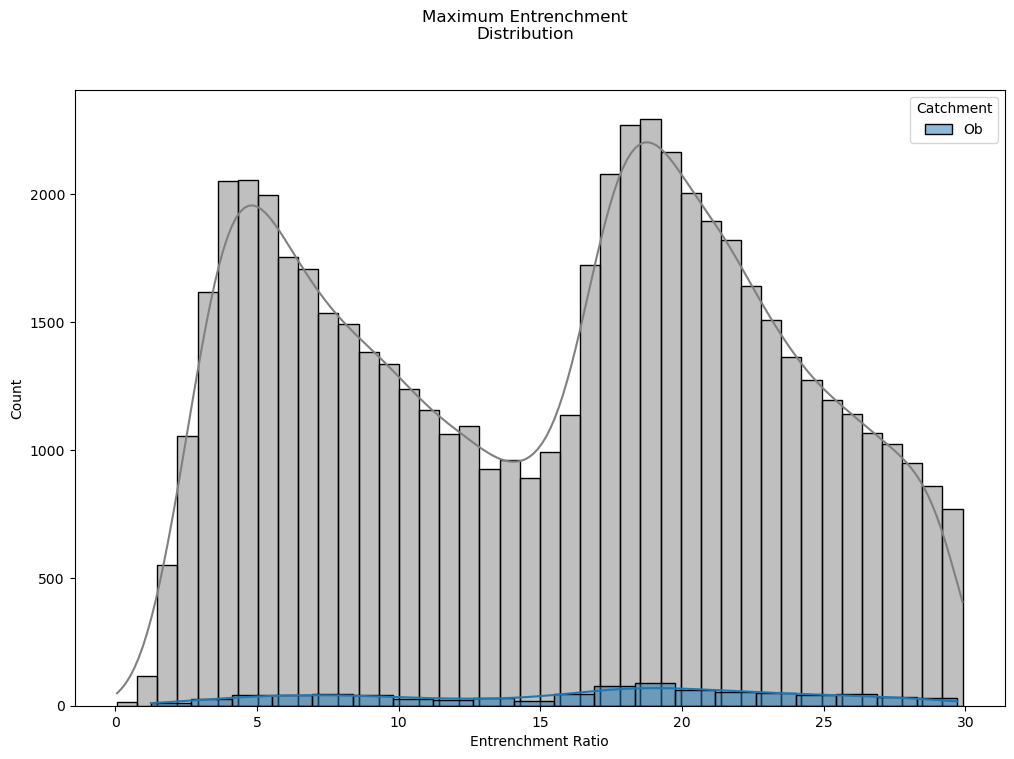

In [42]:
dfP = dfT.copy()
dfP = dfP[(dfP.ERMin < 29.9)]


f, ax = plt.subplots(ncols = 1, figsize = [12,8])
# dfCatch = dfP[dfP.File.isin(['sa_62', 'as_34', 'eu_23'])]
dfCatch = dfP[dfP.File.isin(['as_48', 'eu_28'])]
dfCatch = dfP[dfP.File.isin(['eu_28'])]


sns.histplot(data = dfP, x = 'ERMin', kde = True, ax = ax, color = 'gray', label = 'A')
sns.histplot(data = dfCatch, x = 'ERMin', hue = 'File', kde = True, ax = ax, bins = 20)

legend = ax.get_legend()
handles = legend.legend_handles
ax.legend(handles, ['Ob', 'Amazone'], title='Catchment')
ax.set_xlabel('Entrenchment Ratio')
f.suptitle('Maximum Entrenchment\nDistribution')
plt.savefig(directory + 'results/figures/ERMin_distribution.png')
plt.show()

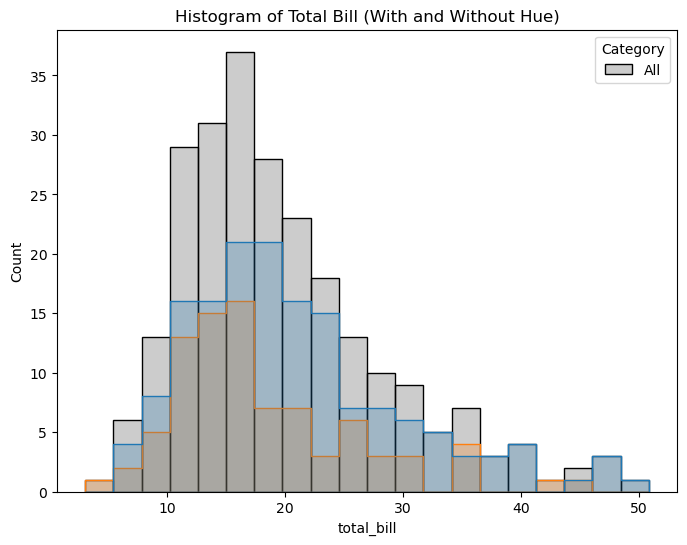

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load an example dataset
tips = sns.load_dataset("tips")

# Create the plot
plt.figure(figsize=(8, 6))

# Plot overall histogram (for all categories)
sns.histplot(tips['total_bill'], color='gray', kde=False, alpha=0.4, bins=20, label='All')

# Plot histogram with hue (by 'sex')
sns.histplot(data=tips, x='total_bill', hue='sex', element='step', kde=False, bins=20)

# Get the current handles and labels from both plots
handles, labels = plt.gca().get_legend_handles_labels()

# Create a single unified legend
plt.legend(handles=handles, labels=['All', 'Male', 'Female'], title='Category')

# Add title and show the plot
plt.title('Histogram of Total Bill (With and Without Hue)')
plt.show()

In [16]:
# import plotly.express as px
# # df = px.data.iris()
# fig = px.scatter_3d(dfP, x='ER', y='ERMin', z='ERMax')
# fig.show()

In [46]:
print(dfdata[dfdata.labels == 0].ERMin.max())
print(dfdata[dfdata.labels == 1].ERMin.max())
print(dfdata[dfdata.labels == 2].ERMin.max())

30.28367360694121
13.117879303811822
24.44804243076584


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


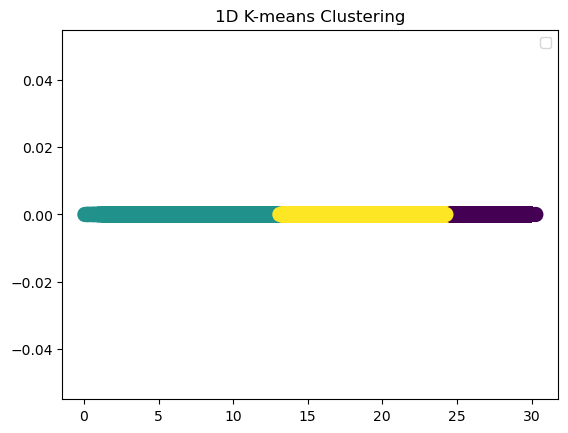

In [41]:


# Generate 1D data
dfdata = dfT.copy()
dfdata = dfdata[dfdata.ERMin < 35]
data = dfdata.ERMin.values.reshape(-1, 1)
# data = data[data.ERMin < 29.9].ERMin.values.reshape(-1, 1)

# Apply K-means with 3 clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)

# Get the cluster labels
labels = kmeans.labels_

dfdata.loc[:, 'labels'] = labels
# Plot the clusters
plt.scatter(data, np.zeros_like(data), c=labels, cmap='viridis', s=100)
plt.title('1D K-means Clustering')

plt.show()

MemoryError: Unable to allocate 536. TiB for an array with shape (73701612448704,) and data type float64

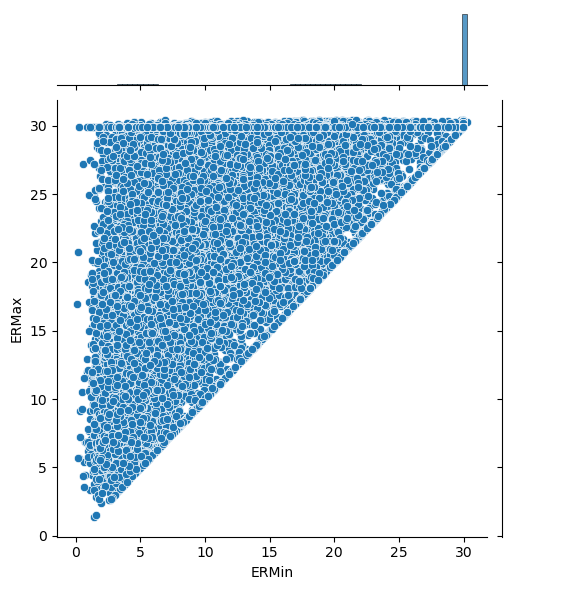

In [27]:
dfP = dfT.copy()
# dfP = dfP[dfP.ERMax < 25.9]
X = 'ERMin'
Y = 'ERMax'
sns.jointplot(data = dfP, x = X, y = Y)

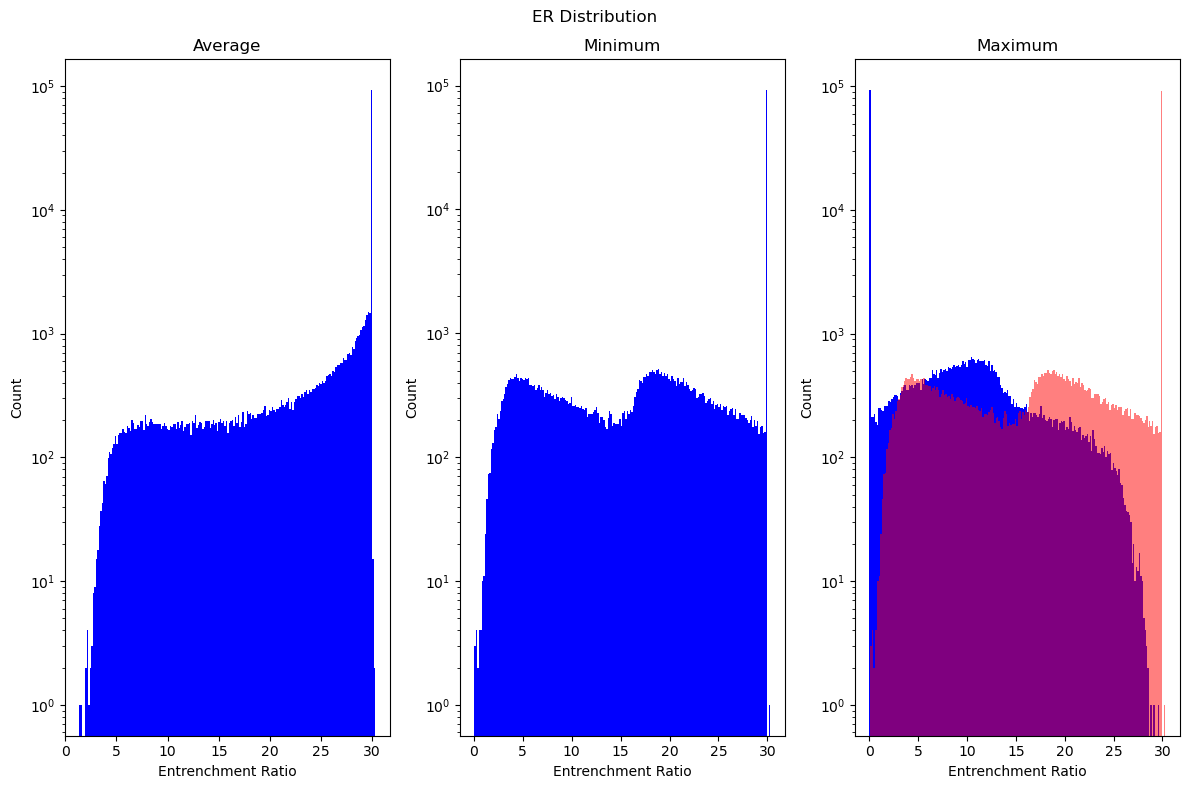

In [32]:
dfP = dfT.copy()
# dfP = dfP[(dfP.mSlope > 0.00000005)]
# dfP['logERMin'] = np.log10(dfP['ERMin'])

f, ax = plt.subplots(ncols = 3, figsize = [12,8])

ax[0].hist(dfP.ER,color = 'blue', bins = 200)
ax[0].set_yscale('log')
# ax[0].set_xscale('log')
ax[0].set_title('Average')
ax[0].set_xlabel('Entrenchment Ratio')
ax[0].set_ylabel('Count')

ax[1].hist(dfP.ERMin,color = 'blue', bins = 200)
ax[1].set_yscale('log')
ax[1].set_title('Minimum')
ax[1].set_xlabel('Entrenchment Ratio')
ax[1].set_ylabel('Count')

ax[2].hist(dfP.ERMax - dfP.ERMin,color = 'blue', bins = 200)
ax[2].hist( dfP.ERMin,color = 'red', bins = 200, alpha = 0.5)
ax[2].set_yscale('log')
# ax[1].set_xscale('log')
ax[2].set_title('Maximum')
ax[2].set_xlabel('Entrenchment Ratio')
ax[2].set_ylabel('Count')


f.suptitle('ER Distribution')
# plt.xlabel('Slope m/m')
# plt.ylabel('Count')
plt.savefig(directory + 'results/figures/dist_ER15.png')
plt.tight_layout()
plt.show()

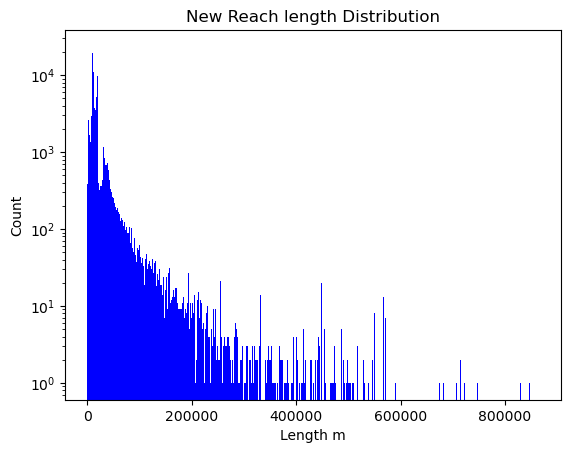

In [44]:
dfP = dfT.copy()
# dfP = dfP[(dfP.mSlope > 0.00000005)]


# plt.hist(dfT.reach_len, bins = 1000)
plt.hist(dfP.reach_len, bins = 1000,color = 'blue')
plt.yscale('log')
# plt.xscale('log')
plt.title('New Reach length Distribution')
plt.xlabel('Length m')
plt.ylabel('Count')
plt.savefig(directory + 'results/figures/dist_length.png')
plt.show()

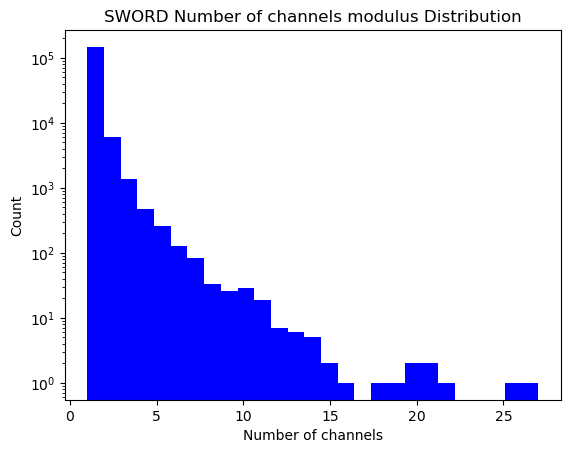

In [45]:
plt.hist(dfT.n_chan_mod, bins = dfT.n_chan_mod.max(), color = 'blue')
plt.yscale('log')
plt.title('SWORD Number of channels modulus Distribution')
plt.xlabel('Number of channels')
plt.ylabel('Count')
plt.savefig(directory + 'results/figures/dist_nchan_mod.png')

plt.show()

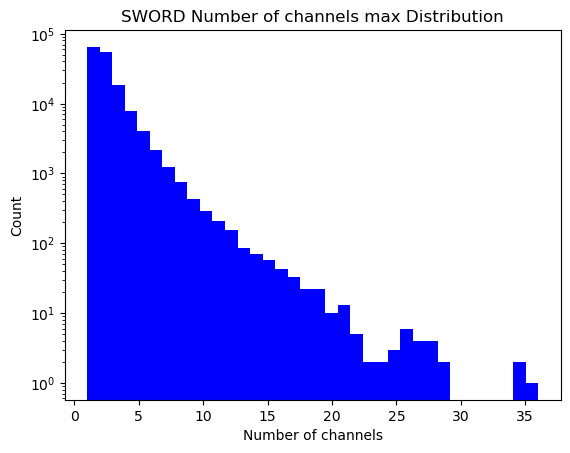

In [46]:
plt.hist(dfT.n_chan_max, bins = dfT.n_chan_max.max(), color = 'blue')
plt.yscale('log')
plt.title('SWORD Number of channels max Distribution')
plt.xlabel('Number of channels')
plt.ylabel('Count')
plt.savefig(directory + 'results/figures/dist_nchan_max.png')
plt.show()

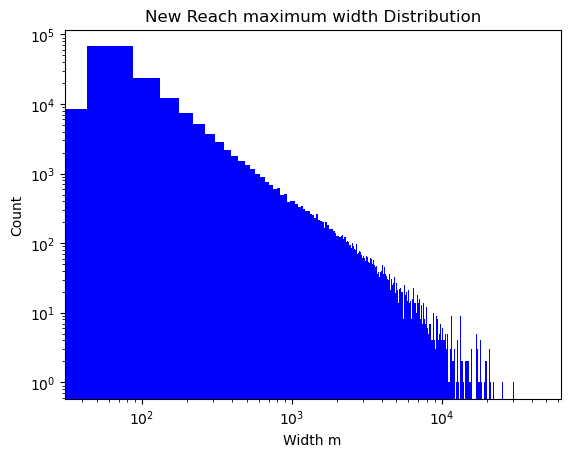

In [47]:
plt.hist(dfT.node_mwm, bins = 1000, color = 'blue')
plt.yscale('log')
plt.xscale('log')
plt.title('New Reach maximum width Distribution')
plt.xlabel('Width m')
plt.ylabel('Count')
plt.savefig(directory + 'results/figures/dist_tot_width.png')

plt.show()

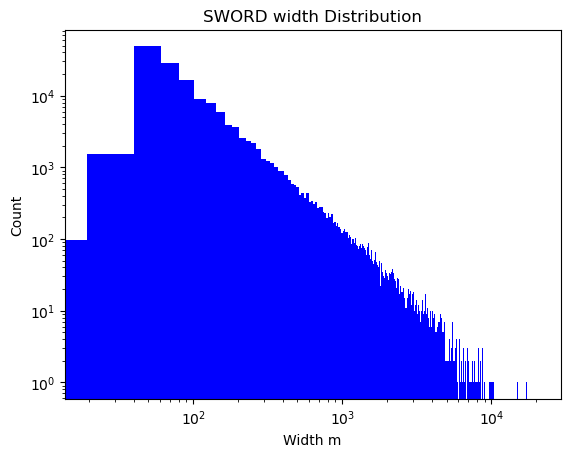

In [48]:
plt.hist(dfT.width, bins = 1000, color = 'blue')
plt.yscale('log')
plt.xscale('log')
plt.title('SWORD width Distribution')
plt.xlabel('Width m')
plt.ylabel('Count')
plt.savefig(directory + 'results/figures/dist_width.png')

plt.show()

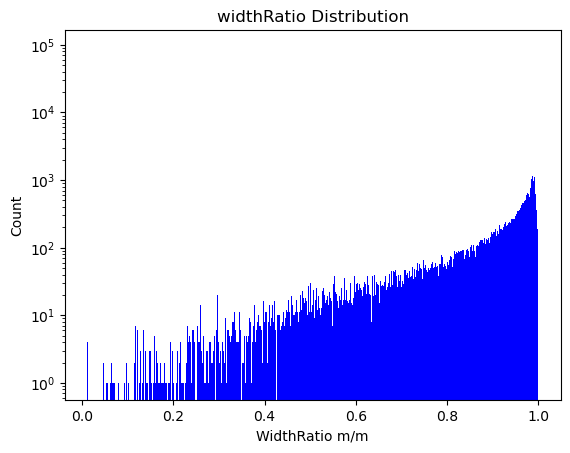

In [49]:
dfP = dfT.copy()
dfP = dfP[dfP.widthRatio <= 1]

plt.hist(dfP.widthRatio, bins = 1000, color = 'blue')
plt.yscale('log')
# plt.xscale('log')
plt.title('widthRatio Distribution')
plt.xlabel('WidthRatio m/m')
plt.ylabel('Count')
plt.savefig(directory + 'results/figures/dist_widthRatio.png')

plt.show()

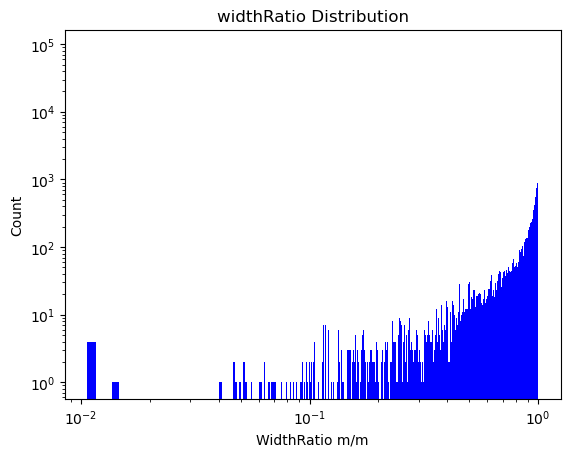

In [48]:
dfP = dfT.copy()
T = 'widthRatio'
dfP = dfP[dfP.widthRatio <= 1]

plt.hist(dfP[T], bins = 1000, color = 'blue')
plt.yscale('log')
plt.xscale('log')
plt.title('widthRatio Distribution')
plt.xlabel('WidthRatio m/m')
plt.ylabel('Count')
# plt.savefig(directory + 'results/figures/dist_widthRatio.png')
plt.show()

## Figures

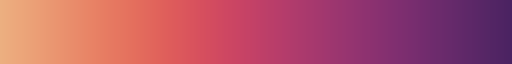

In [28]:
rb = create_custom_cmap(['Black','Silver','Lightcoral','Maroon','peru','yellow','olivedrab','darkolivegreen','lime',
                         'cyan','deepskyblue','Blue','Darkviolet','purple','magenta','wheat'],False, False)

rbRBG = create_custom_cmap(['Black','Silver','Lightcoral','Maroon','peru','yellow','olivedrab','darkolivegreen','lime',
                         'cyan','deepskyblue','Blue','Darkviolet','purple','magenta','wheat'],False, True)
# Set your custom color palette
colors = ['Black','Silver','Lightcoral','Maroon','peru','yellow','olivedrab','darkolivegreen','lime',
          'cyan','deepskyblue','Blue','Darkviolet','purple','magenta','wheat']

customPalette = sns.set_palette(sns.color_palette(colors))
cont = sns.color_palette("flare", as_cmap=True)
cont


In [59]:
import numpy as np
from scipy.signal import argrelextrema

x = np.random.random(12)

# for local minima
argrelextrema(dfP['ERMin'].values, np.less)

(array([    2,     5,    11, ..., 51085, 51087, 51093]),)

In [49]:
def mean_dist_neighbors(group, cols):
    Xnear = group[cols]
    nbrs = NearestNeighbors(n_neighbors= 10, algorithm='ball_tree').fit(Xnear)
    distances, indices = nbrs.kneighbors(Xnear)
    meanD = np.mean(distances, axis = 1)
    group['meanD'] = meanD
    group['stdD']  = 3*np.std(meanD)
    group['countD'] = len(meanD)
    return group

def scatter_with_color_limits(x,y,c,vm,litho, count,**kwargs):
    vmax = vm.max()

    plt.scatter(x,y, c = c, vmin = 0, vmax = vmax, alpha =0.5, s = 1)
    # plt.scatter(x,y)
    plt.title(f'{litho.unique()[0]}: {count.unique()[0]}')

    plt.colorbar()




### ER  vs river slope regressions

In [50]:


# Sample data

# Select variables for regression
for litho in ['Unconsolidated Sediments', 'Rock']:
    D = dfP.copy()
    D = D[D['Lithology'] == litho]
    
    D['ERDelta'] = D['ERMax'] - D['ERMin']
    # x = D['mSlope']
    D = D[~D.ERDelta.isna()]
    y = D['ERDelta']
    x = D['ER']



    for i in range(1,8):
        # Fit a 2nd-order polynomial (quadratic)
        coeffs = np.polyfit(x, y, i)  # Returns coefficients for quadratic regression
        poly_eq = np.poly1d(coeffs)  # Create a polynomial equation from the coefficients

        # Calculate predicted values
        y_pred = poly_eq(x)

        # Calculate R-squared
        r2 = r2_score(y, y_pred)
        print(r2)
    print()

0.19534396205335647
0.4512148799909701
0.4676644026076172
0.4750669718413725
0.4805372865367359
0.48529970772255104
0.48958797588717284

0.025119805593494027
0.3905392074016345
0.3974713445156144
0.40350391834212496
0.40769042109858333
0.40937004075984484
0.41088689408642054



In [37]:
def mean_dist_neighbors(group, cols):
    Xnear = group[cols]
    nbrs = NearestNeighbors(n_neighbors= 10, algorithm='ball_tree').fit(Xnear)
    distances, indices = nbrs.kneighbors(Xnear)
    meanD = np.mean(distances, axis = 1)
    group['meanD'] = meanD
    group['stdD']  = 3*np.std(meanD)
    group['countD'] = len(meanD)
    return group

dfP = dfP.groupby('File', group_keys=False).apply(lambda x: mean_dist_neighbors(x, [X, Y]))

# ERMin vs Slope

In [7]:
dfP = dfT.copy()
dfP.loc[dfP.mSlope < 1e-10, 'mSlope'] = 0
# dfP = dfP[(dfP.mSlope < 0.8) & (dfP['ERMin'] < 29.9)]

# dfP = dfP[(dfP.mSlope > 0.00000005)  & (dfP.mSlope < 0.8) & (dfP['ERMin'] < 29.9)]
dfP['logSlope'] = np.log10(dfP['mSlope'])
dfP['Lithology'] = np.where(dfP['xx'] == 'su', 'Unconsolidated Sediments',
                  np.where(dfP['xx'] == 'sm', 'Rock',
                  'Rock'))
X = 'logSlope'
Y = 'ERMin'
C = 'Lithology'
# X = 'widthRatio'


In [41]:
print(f'Completely unconfined: {dfT[dfT.ERMin >29.9].shape[0]}')
print(f'Some confinemend: {dfT[dfT.ERMin <29.9].shape[0]}')

print(f'confinemend to some degree: {dfT[dfT.ERMax <29.9].shape[0]}')

Completely unconfined: 91996
Some confinemend: 57171
Some confinemend: 20913


### ERMin  vs river slope per lithology

1


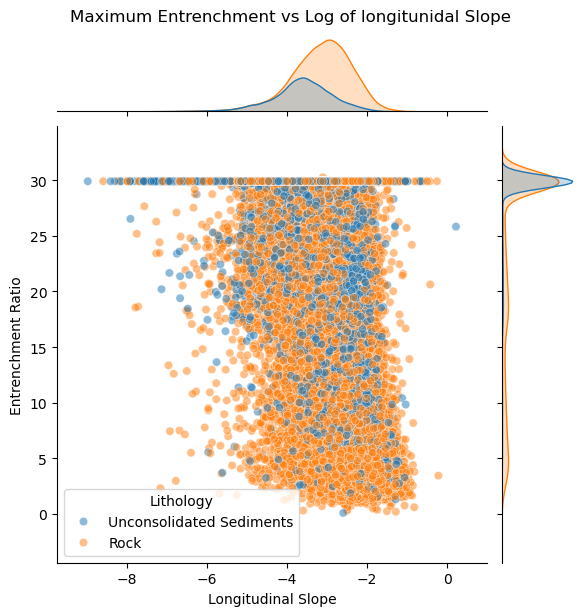

In [143]:

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
for i in range(1,2):
    print(i)
    g  = sns.jointplot(y=Y, x=X, data=dfP, hue=C, alpha=0.5)
    # g  = sns.jointplot(y='ERMin', x='logSlope', data=dfP, alpha=0.5)
    g1 = sns.regplot(y=Y, x=X, data=dfP[dfP.Lithology == 'Unconsolidated Sediments'],order = i, scatter=False, ax=g.ax_joint)
    g2 = sns.regplot(y=Y, x=X, data=dfP[dfP.Lithology == 'Rock'], order = i ,scatter=False, ax=g.ax_joint)
    regline1 = g1.get_lines()[0]
    regline1.set_color('red')
    regline1.set_zorder(5)

    regline2 = g2.get_lines()[0]
    regline2.set_color('green')
    regline2.set_zorder(5)

    plt.xlabel('Longitudinal Slope')
    plt.ylabel('Entrenchment Ratio')
    plt.suptitle('Maximum Entrenchment vs Log of longitunidal Slope', y = 1.02)
    # plt.ylim([0,25])
    plt.savefig(directory + f'results/figures/{X}_{Y}_LithoGroups_zoom.png')
    plt.show()

### ERMin vs Slope

In [32]:
dfER3

Unnamed: 0     reach_id         ER           VW          BW     ERSide1  \
0              0  11410000021  29.925000  3584.587500  119.785714         NaN   
1              1  11410000021  29.925000  3174.187500  106.071429         NaN   
2              2  11410000021  29.925000  3230.539773  107.954545         NaN   
3              3  11410000021  29.925000  3293.887500  110.071429         NaN   
4              4  11410000021  29.925000  3168.725000  105.888889         NaN   
...          ...          ...        ...          ...         ...         ...   
9142        9142  67209600121   7.420669   328.870548   44.318182   22.159091   
9143        9143  67209600121   4.672970   203.975133   43.650000  182.150133   
9144        9144  67209600121   8.128425   353.586500   43.500000   21.750000   
9145        9145  67209600121   2.902241   118.084941   40.687500   97.741191   
9146        9146  67209600121   3.212680   130.916719   40.750000   79.885333   

         ERSide2   ERSS       SInn       SOut     SCOut     SCInn   File  \
0            NaN    NaN   0.214809   0.026985  1.629594  1.360340  af_11   
1            NaN    NaN   0.042075   0.195415  1.428254  1.597898  af_11   
2            NaN    NaN  -0.021795   0.132862  1.550204  1.875160  af_11   
3            NaN    NaN   0.085895   0.006996  1.844010  1.690639  af_11   
4            NaN    NaN   0.037707   0.198771  1.381200  1.741119  af_11   
...          ...    ...        ...        ...       ...       ...    ...   
9142  306.711457  False   0.948630  90.000000  1.000000  1.359341  sa_67   
9143   21.825000  False  90.000000   1.648453  1.462381  1.000000  sa_67   
9144  331.836500  False   0.855115  90.000000  1.000000  1.199411  sa_67   
9145   20.343750  False  90.000000   3.141354  1.855379  1.000000  sa_67   
9146   51.031386  False   7.606501   4.057643  1.884583  1.613300  sa_67   

         CSlope  
0      0.120897  
1      0.118745  
2      0.055533  
3      0.046445  
4      0.118239  
...         ...  
9142  45.474315  
9143  45.824226  
9144  45.427557  
9145  46.570677  
9146   5.832072  

[2627986 rows x 14 columns]

1


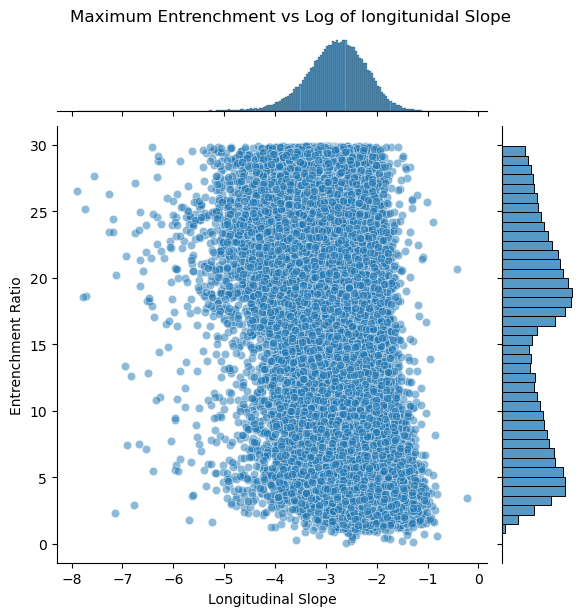

In [124]:
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
dfP = dfER3.copy()
dfP = dfP.groupby('reach_id', as_index = False).ER.agg(['mean', 'min','max'])

for i in range(1,2):
    print(i)
    g  = sns.jointplot(y=Y, x=X, data=dfP, alpha=0.5)
    # g  = sns.jointplot(y='ERMin', x='logSlope', data=dfP, alpha=0.5)
    g1 = sns.regplot(y=Y, x=X, data=dfP,order = i, scatter=False, ax=g.ax_joint)
    regline1 = g1.get_lines()[0]
    regline1.set_color('red')
    regline1.set_zorder(5)



    plt.xlabel('Longitudinal Slope')
    plt.ylabel('Entrenchment Ratio')
    plt.suptitle('Maximum Entrenchment vs Log of longitunidal Slope', y=1.02)
    # plt.ylim([0,25])
    plt.savefig(directory + f'results/figures/{X}_{Y}_LithoGroups_zoom.png')
    plt.show()

### ERMin vs Slope Amazone catchment

1


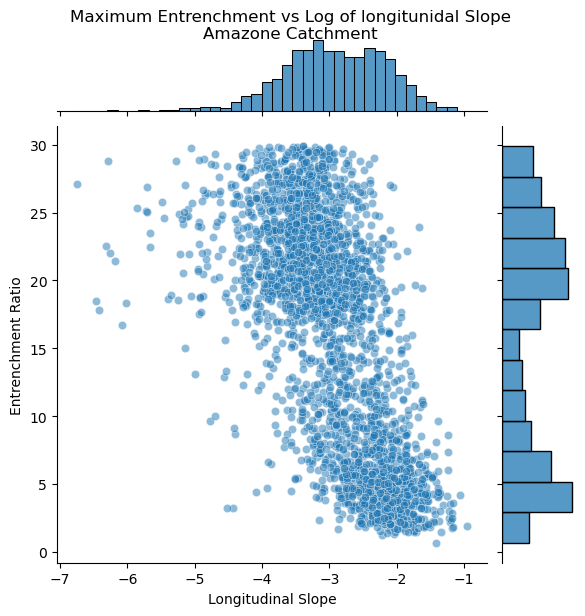

In [125]:
dfAmazone = dfP[dfP.File == 'sa_62']
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
for i in range(1,2):
    print(i)
    g  = sns.jointplot(y=Y, x=X, data=dfAmazone, alpha=0.5)
    # g  = sns.jointplot(y='ERMin', x='logSlope', data=dfP, alpha=0.5)
    g1 = sns.regplot(y=Y, x=X, data=dfP,order = i, scatter=False, ax=g.ax_joint)
    regline1 = g1.get_lines()[0]
    regline1.set_color('red')
    regline1.set_zorder(5)



    plt.xlabel('Longitudinal Slope')
    plt.ylabel('Entrenchment Ratio')
    plt.suptitle('Maximum Entrenchment vs Log of longitunidal Slope\nAmazone Catchment',y=1.02)
    # plt.ylim([0,25])
    plt.savefig(directory + f'results/figures/{X}_{Y}_LithoGroups_zoom.png')
    plt.show()

### ERMin vs Slope India catchment

1


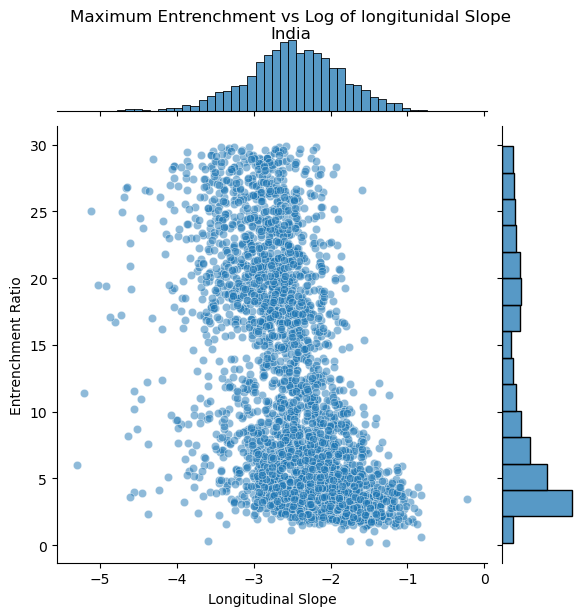

In [126]:
dfIndia = dfP[dfP.File == 'as_45']

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
for i in range(1,2):
    print(i)
    g  = sns.jointplot(y=Y, x=X, data=dfIndia, alpha=0.5)
    # g  = sns.jointplot(y='ERMin', x='logSlope', data=dfP, alpha=0.5)
    g1 = sns.regplot(y=Y, x=X, data=dfP,order = i, scatter=False, ax=g.ax_joint)
    regline1 = g1.get_lines()[0]
    regline1.set_color('red')
    regline1.set_zorder(5)



    plt.xlabel('Longitudinal Slope')
    plt.ylabel('Entrenchment Ratio')
    plt.suptitle('Maximum Entrenchment vs Log of longitunidal Slope\nIndia', y=1.02)
    # plt.ylim([0,25])
    plt.savefig(directory + f'results/figures/{X}_{Y}_LithoGroups_zoom.png')
    plt.show()

### ERMin vs Slope Ob river catchment

1


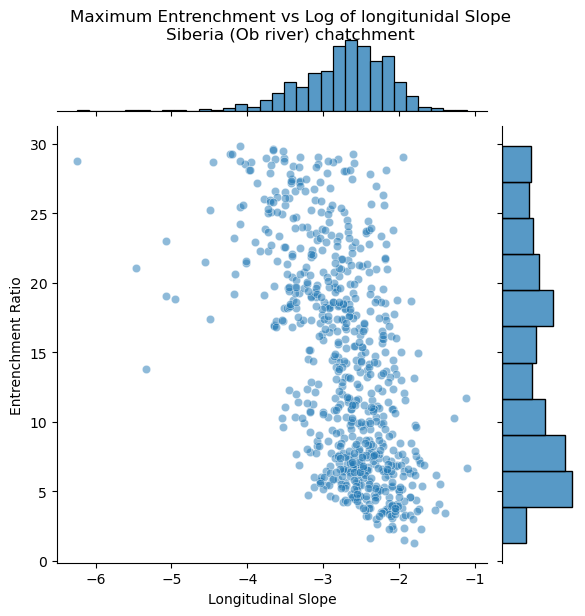

In [128]:
dfOb = dfP[dfP.File == 'as_31']

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
for i in range(1,2):
    print(i)
    g  = sns.jointplot(y=Y, x=X, data=dfOb, alpha=0.5)
    # g  = sns.jointplot(y='ERMin', x='logSlope', data=dfP, alpha=0.5)
    g1 = sns.regplot(y=Y, x=X, data=dfP,order = i, scatter=False, ax=g.ax_joint)
    regline1 = g1.get_lines()[0]
    regline1.set_color('red')
    regline1.set_zorder(5)


    plt.xlabel('Longitudinal Slope')
    plt.ylabel('Entrenchment Ratio')
    plt.suptitle('Maximum Entrenchment vs Log of longitunidal Slope\nSiberia (Ob river) chatchment', y=1.02)
    # plt.ylim([0,25])
    plt.savefig(directory + f'results/figures/{X}_{Y}_LithoGroups_zoom.png')
    plt.show()

### ERMin vs Slope EU rhine catchment

1


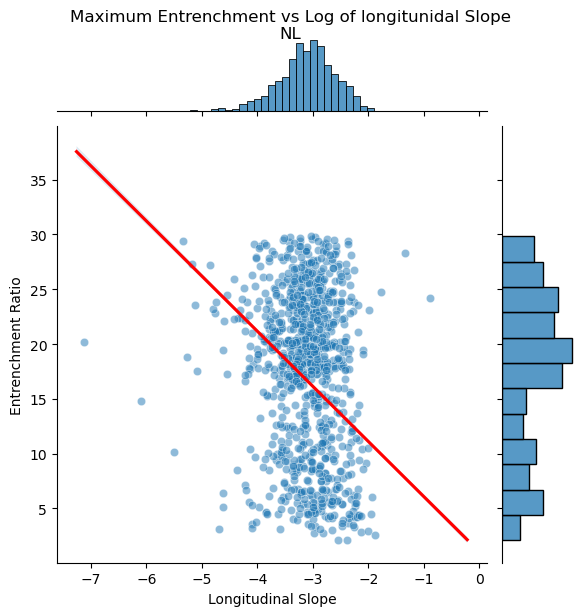

In [145]:
dfNL = dfP[dfP.File == 'eu_23']

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
for i in range(1,2):
    print(i)
    g  = sns.jointplot(y=Y, x=X, data=dfNL, alpha=0.5)
    # g  = sns.jointplot(y='ERMin', x='logSlope', data=dfP, alpha=0.5)
    g1 = sns.regplot(y=Y, x=X, data=dfP,order = i, scatter=False, ax=g.ax_joint)
    regline1 = g1.get_lines()[0]
    regline1.set_color('red')
    regline1.set_zorder(5)



    plt.xlabel('Longitudinal Slope')
    plt.ylabel('Entrenchment Ratio')
    plt.suptitle('Maximum Entrenchment vs Log of longitunidal Slope\nNL', y=1.02)
    # plt.ylim([0,25])
    plt.savefig(directory + f'results/figures/{X}_{Y}_LithoGroups_zoom.png')
    plt.show()

# ERMin??

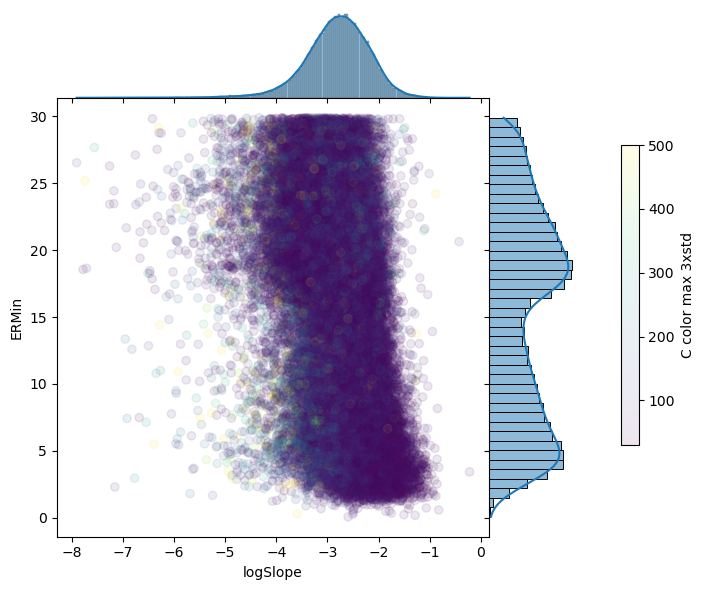

In [138]:
dfP = dfT.copy()
dfP.loc[dfP.mSlope < 1e-10, 'mSlope'] = 0
dfP = dfP[(dfP.mSlope < 0.8) & (dfP['ERMin'] < 29.9)]

# dfP = dfP[(dfP.mSlope > 0.00000005)  & (dfP.mSlope < 0.8) & (dfP['ERMin'] < 29.9)]
dfP['logSlope'] = np.log10(dfP['mSlope'])
dfP['Lithology'] = np.where(dfP['xx'] == 'su', 'Unconsolidated Sediments',
                  np.where(dfP['xx'] == 'sm', 'Rock',
                  'Rock'))
X = 'logSlope'
Y = 'ERMin'
C = 'Lithology'
# X = 'widthRatio'

b1 = 14
b2 = 29.9
# dfP = dfP[dfP['ERMin'] < b1]
# dfP = dfP[(dfP['ERMin'] > b1) & (dfP['ERMin'] < b2)]
# dfP = dfP[dfP['ERMax'] < 29.9]
# dfP = dfP[dfP['xxFull'] == 'Unconsolidated Sediments']
# dfP = dfP[dfP['File'] == 'as_45']
# dfP = dfP[dfP['xxFull'] != 'Unconsolidated Sediments']
# dfP = dfP[dfP['ERMin'] < 29.9]
# Generate some example data
np.random.seed(42)
data = pd.DataFrame({
    'x': np.random.normal(size=100),
    'y': np.random.normal(size=100),
    'color_var': np.random.rand(100)  # This is the continuous variable for color
})

X = 'logSlope'
Y = 'ERMin'
C = 'width'
# Create the jointplot
g = sns.JointGrid(data=dfP, x=X, y=Y, space=0)

# Scatter plot with continuous color
scatter = g.ax_joint.scatter(dfP[X], dfP[Y], c=dfP[C], cmap='viridis', alpha= 0.1, vmin = 30, vmax = dfP[C].mean() + (dfP[C].std()* 3))
# add color bar below chart

cbar_ax = g.fig.add_axes([1.05, 0.25, 0.03, 0.5])  # [left, bottom, width, height] of colorbar

# Add colorbar to the new axes
cbar = plt.colorbar(scatter, cax=cbar_ax)
cbar.set_label('C color max 3xstd')

# Add marginal histograms for the x and y axes
sns.histplot(dfP[X], ax=g.ax_marg_x, kde=True)
sns.histplot(data = dfP, y = Y, ax=g.ax_marg_y, kde=True)

# Show the plot
plt.show()


# ER Delta vs ER

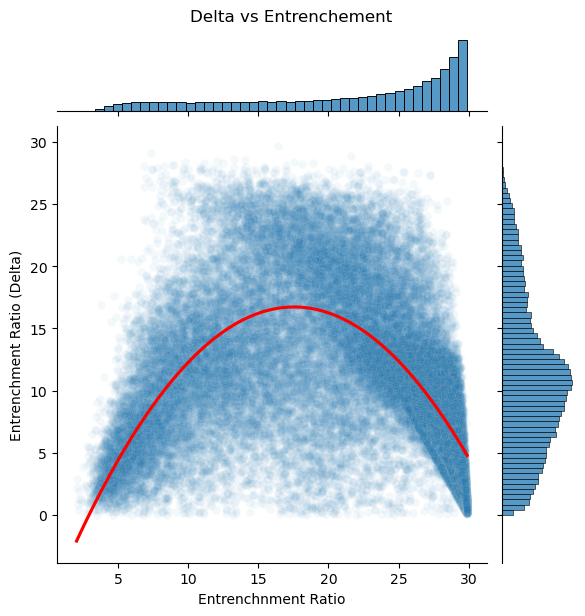

r2:  0.4521718451051421


In [58]:
dfP = dfT.copy()
dfP.loc[dfP.mSlope < 1e-10, 'mSlope'] = 0
# dfP = dfP[(dfP.mSlope < 0.8) & (dfP['ERMin'] < 29.9)]

dfP = dfP[(dfP['ER'] < 29.9)]

dfP['logSlope'] = np.log10(dfP['mSlope'])
dfP['Lithology'] = np.where(dfP['xx'] == 'su', 'Unconsolidated Sediments',
                  np.where(dfP['xx'] == 'sm', 'Rock',
                  'Rock'))
dfP['ERDelta'] = dfP['ERMax'] - dfP['ERMin']

X = 'ER'
Y = 'ERDelta'
dfP = dfP[(dfP['ERDelta'] != 0)]
# C = 'Lithology'


cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
for i in range(2,3):
    # g  = sns.jointplot(y=Y, x=X,hue = 'Lithology', data=dfP, alpha=0.05)
    g  = sns.jointplot(y=Y, x=X, data=dfP, alpha=0.05)
    g1 = sns.regplot(y=Y, x=X, data=dfP,order = 2, scatter=False, ax=g.ax_joint)
    # g1 = sns.regplot(y=Y, x=X, data=dfP[dfP.Lithology == 'Unconsolidated Sediments'],order = 2, scatter=False, ax=g.ax_joint)
    # g2 = sns.regplot(y=Y, x=X, data=dfP[dfP.Lithology == 'Rock'], order = 2 ,scatter=False, ax=g.ax_joint)
    regline1 = g1.get_lines()[0]
    regline1.set_color('red')
    regline1.set_zorder(5)

    # regline2 = g2.get_lines()[0]
    # regline2.set_color('green')
    # regline2.set_zorder(5)


    plt.xlabel('Entrenchnment Ratio')
    plt.ylabel('Entrenchment Ratio (Delta)')
    plt.suptitle('Delta vs Entrenchement', y = 1.02)
    # plt.ylim([0,25])

    plt.show()

    dfP = dfP[~dfP.ERDelta.isna()]
    y = dfP['ERDelta']
    x = dfP['ER']
    coeffs = np.polyfit(x, y, i)  # Returns coefficients for quadratic regression
    poly_eq = np.poly1d(coeffs)  # Create a polynomial equation from the coefficients

    # Calculate predicted values
    y_pred = poly_eq(x)

    # Calculate R-squared
    r2 = r2_score(y, y_pred)
    print('r2: ', r2)

0 0.003587516538457364


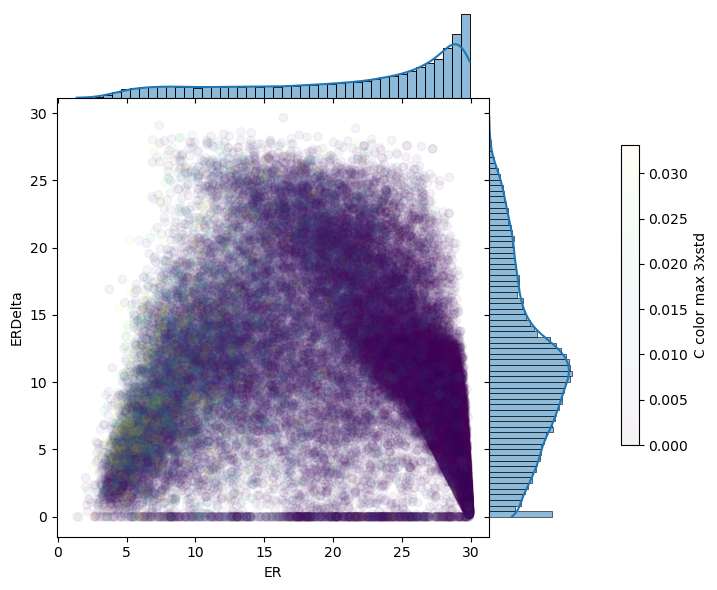

In [42]:
dfP = dfT.copy()
dfP.loc[dfP.mSlope < 1e-10, 'mSlope'] = 0
# dfP = dfP[(dfP.mSlope < 0.8) & (dfP['ERMin'] < 29.9)]

dfP = dfP[(dfP['ER'] < 29.9)]

dfP['logSlope'] = np.log10(dfP['mSlope'])
# dfP = dfP[~dfP['logSlope'].isna()]
dfP['Lithology'] = np.where(dfP['xx'] == 'su', 'Unconsolidated Sediments',
                  np.where(dfP['xx'] == 'sm', 'Rock',
                  'Rock'))
dfP['ERDelta'] = dfP['ERMax'] - dfP['ERMin']

X = 'ER'
Y = 'ERDelta'
# dfP = dfP[(dfP['ERDelta'] != 0)]


X = 'ER'
Y = 'ERDelta'
C = 'mSlope'
# Create the jointplot
g = sns.JointGrid(data=dfP, x=X, y=Y, space=0)
vmin = dfP[C].mean() - (dfP[C].std()* 3)
if vmin < 0:
    vmin = 0
print(vmin, dfP[C].mean())
# Scatter plot with continuous color
scatter = g.ax_joint.scatter(dfP[X], dfP[Y], c=dfP[C], cmap='viridis', alpha= 0.05, vmin = vmin, vmax = dfP[C].mean() + (dfP[C].std()* 3))
# add color bar below chart

cbar_ax = g.fig.add_axes([1.05, 0.25, 0.03, 0.5])  # [left, bottom, width, height] of colorbar

# Add colorbar to the new axes
cbar = plt.colorbar(scatter, cax=cbar_ax)
cbar.set_label('C color max 3xstd')

# Add marginal histograms for the x and y axes
sns.histplot(dfP[X], ax=g.ax_marg_x, kde=True)
sns.histplot(data = dfP, y = Y, ax=g.ax_marg_y, kde=True)

# Show the plot
plt.show()


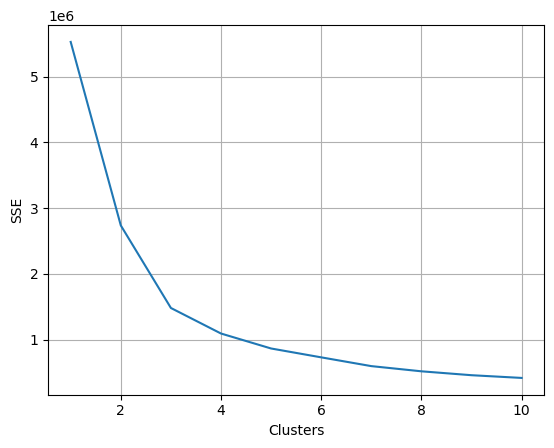

In [39]:
X = dfP.loc[:, ['ERDelta', 'ER', 'mSlope', 'sin5_0']].values
#elbow method
wcss = []
for i in range(1,11):
    k_means = KMeans(n_clusters=i,init='k-means++', random_state=42)
    k_means.fit(X)
    wcss.append(k_means.inertia_)
#plot elbow curve
plt.plot(np.arange(1,11),wcss)
plt.xlabel('Clusters')
plt.ylabel('SSE')
plt.grid()
plt.show()

# X = dfP.loc[:, ['ERDelta', 'ER']].values
# #elbow method
# wcss = []
# for i in range(1,11):
#     k_means = KMeans(n_clusters=i,init='k-means++', random_state=42)
#     k_means.fit(X)
#     wcss.append(k_means.inertia_)
# #plot elbow curve
# plt.plot(np.arange(1,11),wcss)
# plt.xlabel('Clusters')
# plt.ylabel('SSE')
# plt.grid()
# plt.show()

In [40]:
k_means_optimum = KMeans(n_clusters = 4, init = 'k-means++',  random_state=42)
y = k_means_optimum.fit_predict(X)
dfP['clusters'] = y

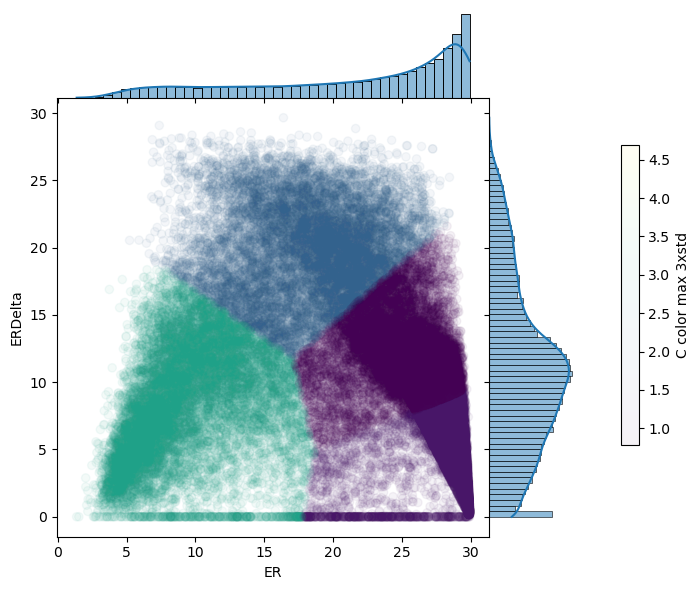

In [41]:
X = 'ER'
Y = 'ERDelta'
C = 'clusters'
# Create the jointplot
g = sns.JointGrid(data=dfP, x=X, y=Y, space=0)

# Scatter plot with continuous color
scatter = g.ax_joint.scatter(dfP[X], dfP[Y], c=dfP[C], cmap='viridis', alpha= 0.05, vmin = vmin, vmax = dfP[C].mean() + (dfP[C].std()* 3))
# add color bar below chart

cbar_ax = g.fig.add_axes([1.05, 0.25, 0.03, 0.5])  # [left, bottom, width, height] of colorbar

# Add colorbar to the new axes
cbar = plt.colorbar(scatter, cax=cbar_ax)
cbar.set_label('C color max 3xstd')

# Add marginal histograms for the x and y axes
sns.histplot(dfP[X], ax=g.ax_marg_x, kde=True)
sns.histplot(data = dfP, y = Y, ax=g.ax_marg_y, kde=True)

# Show the plot
plt.show()

# ER histograms

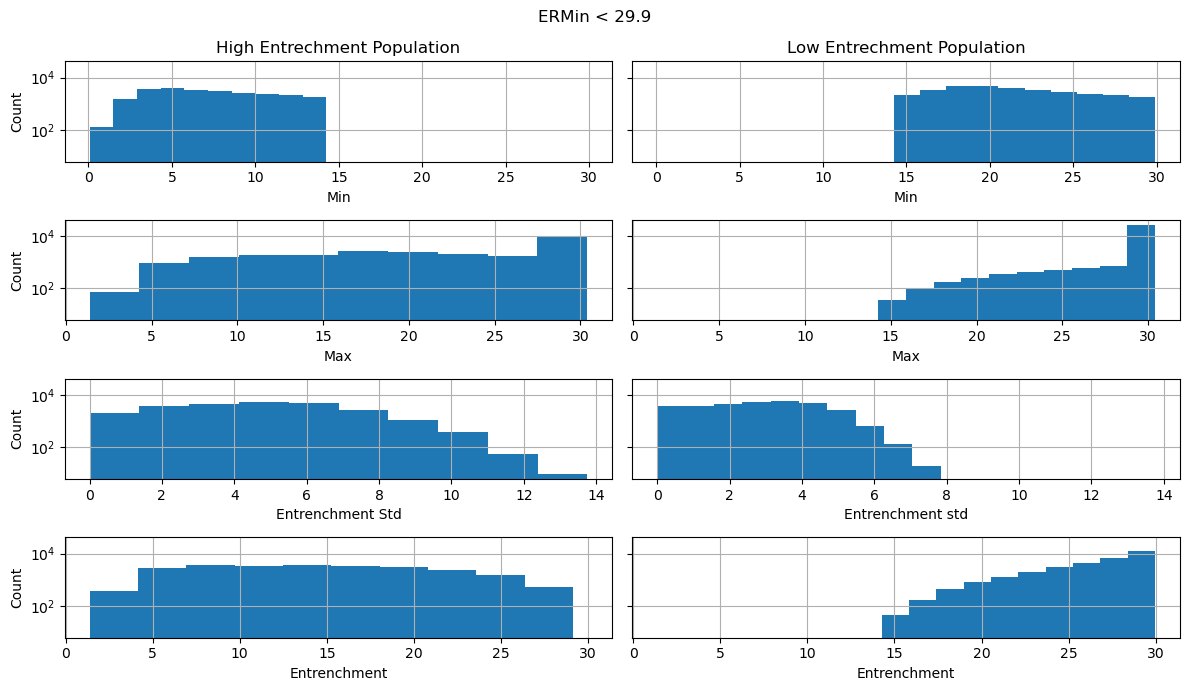

In [198]:
b1 = 14.25
b2 = 29.9
pop1 = dfP[(dfP['ERMin'] < b1) ]
pop2 = dfP[(dfP['ERMin'] > b1) & (dfP['ERMin'] < b2)]

f, ax = plt.subplots(ncols = 2, nrows = 4, sharex = 'row', sharey=True, figsize = [12,7])
T = 'ERMin'
ax[0,0].hist(pop1[T])
ax[0,0].set_yscale('log')
ax[0,0].set_xlabel('Min')
ax[0,0].set_ylabel('Count')
ax[0,0].set_title('High Entrechment Population')
ax[0,0].grid()

ax[0,1].hist(pop2[T])
ax[0,1].set_yscale('log')
ax[0,1].set_xlabel('Min')
ax[0,1].set_title('Low Entrechment Population')
ax[0,1].grid()

T = 'ERMax'
ax[1,0].hist(pop1[T])
ax[1,0].set_yscale('log')
ax[1,0].set_xlabel('Max')
ax[1,0].set_ylabel('Count')
ax[1,0].grid()

ax[1,1].hist(pop2[T])
ax[1,1].set_yscale('log')
ax[1,1].set_xlabel('Max')
ax[1,1].grid()


T = 'ERStd'
ax[2,0].hist(pop1[T])
ax[2,0].set_yscale('log')
ax[2,0].set_xlabel('Entrenchment Std')
ax[2,0].set_ylabel('Count')
ax[2,0].grid()

ax[2,1].hist(pop2[T])
ax[2,1].set_yscale('log')
ax[2,1].set_xlabel('Entrenchment std')
ax[2,1].grid()


T = 'ER'
ax[3,0].hist(pop1[T])
ax[3,0].set_yscale('log')
ax[3,0].set_xlabel('Entrenchment')
ax[3,0].set_ylabel('Count')
ax[3,0].grid()

ax[3,1].hist(pop2[T])
ax[3,1].set_yscale('log')
ax[3,1].set_xlabel('Entrenchment')
ax[3,1].grid()

f.suptitle('ERMin < 29.9')
plt.tight_layout()
plt.show()


# Valley width

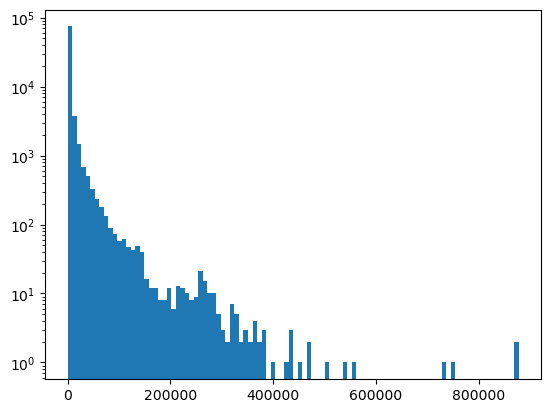

In [41]:
dfP = dfT.copy()

plt.hist(dfP.VALMin, bins = 100)
plt.yscale('log')

In [63]:
A = dfP[(dfP.VAL < 898) & (dfP.VAL > 896)][['reach_id', 'File', 'VAL', 'ER', 'width']]
A

reach_id   File         VAL         ER   width
2626   12553400221  af_12  897.026898  21.287099    42.0
3788   13217000111  af_13  897.750000  29.925000    30.0
4584   13226500181  af_13  897.924585  19.392439    42.0
6603   13275700441  af_13  897.750000  29.925000  3255.0
8057   13346300081  af_13  897.326861  22.625854    42.0
...            ...    ...         ...        ...     ...
83242  22769200401  eu_22  896.634912  20.778524    42.0
83355  22780400781  eu_22  897.493064  19.854531    42.0
84249  23190200691  eu_23  897.399119  16.894112    48.0
84750  23224001221  eu_23  897.994429  19.977629    42.0
85389  23263000301  eu_23  896.866687  16.878786    60.0

[111 rows x 5 columns]

(100.0, 10000.0)

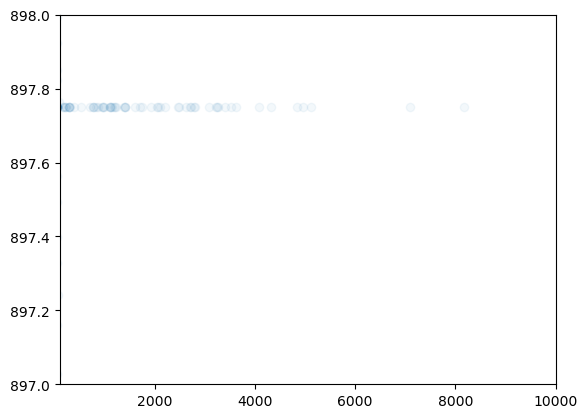

In [59]:
plt.scatter(dfP.width, dfP.VAL, alpha = 0.05)
# plt.yscale('log')
# plt.xscale('log')
plt.ylim([897, 898])
plt.xlim([100,1e4])


# Rest Plots

### In out Slope  vs river slope per lithology

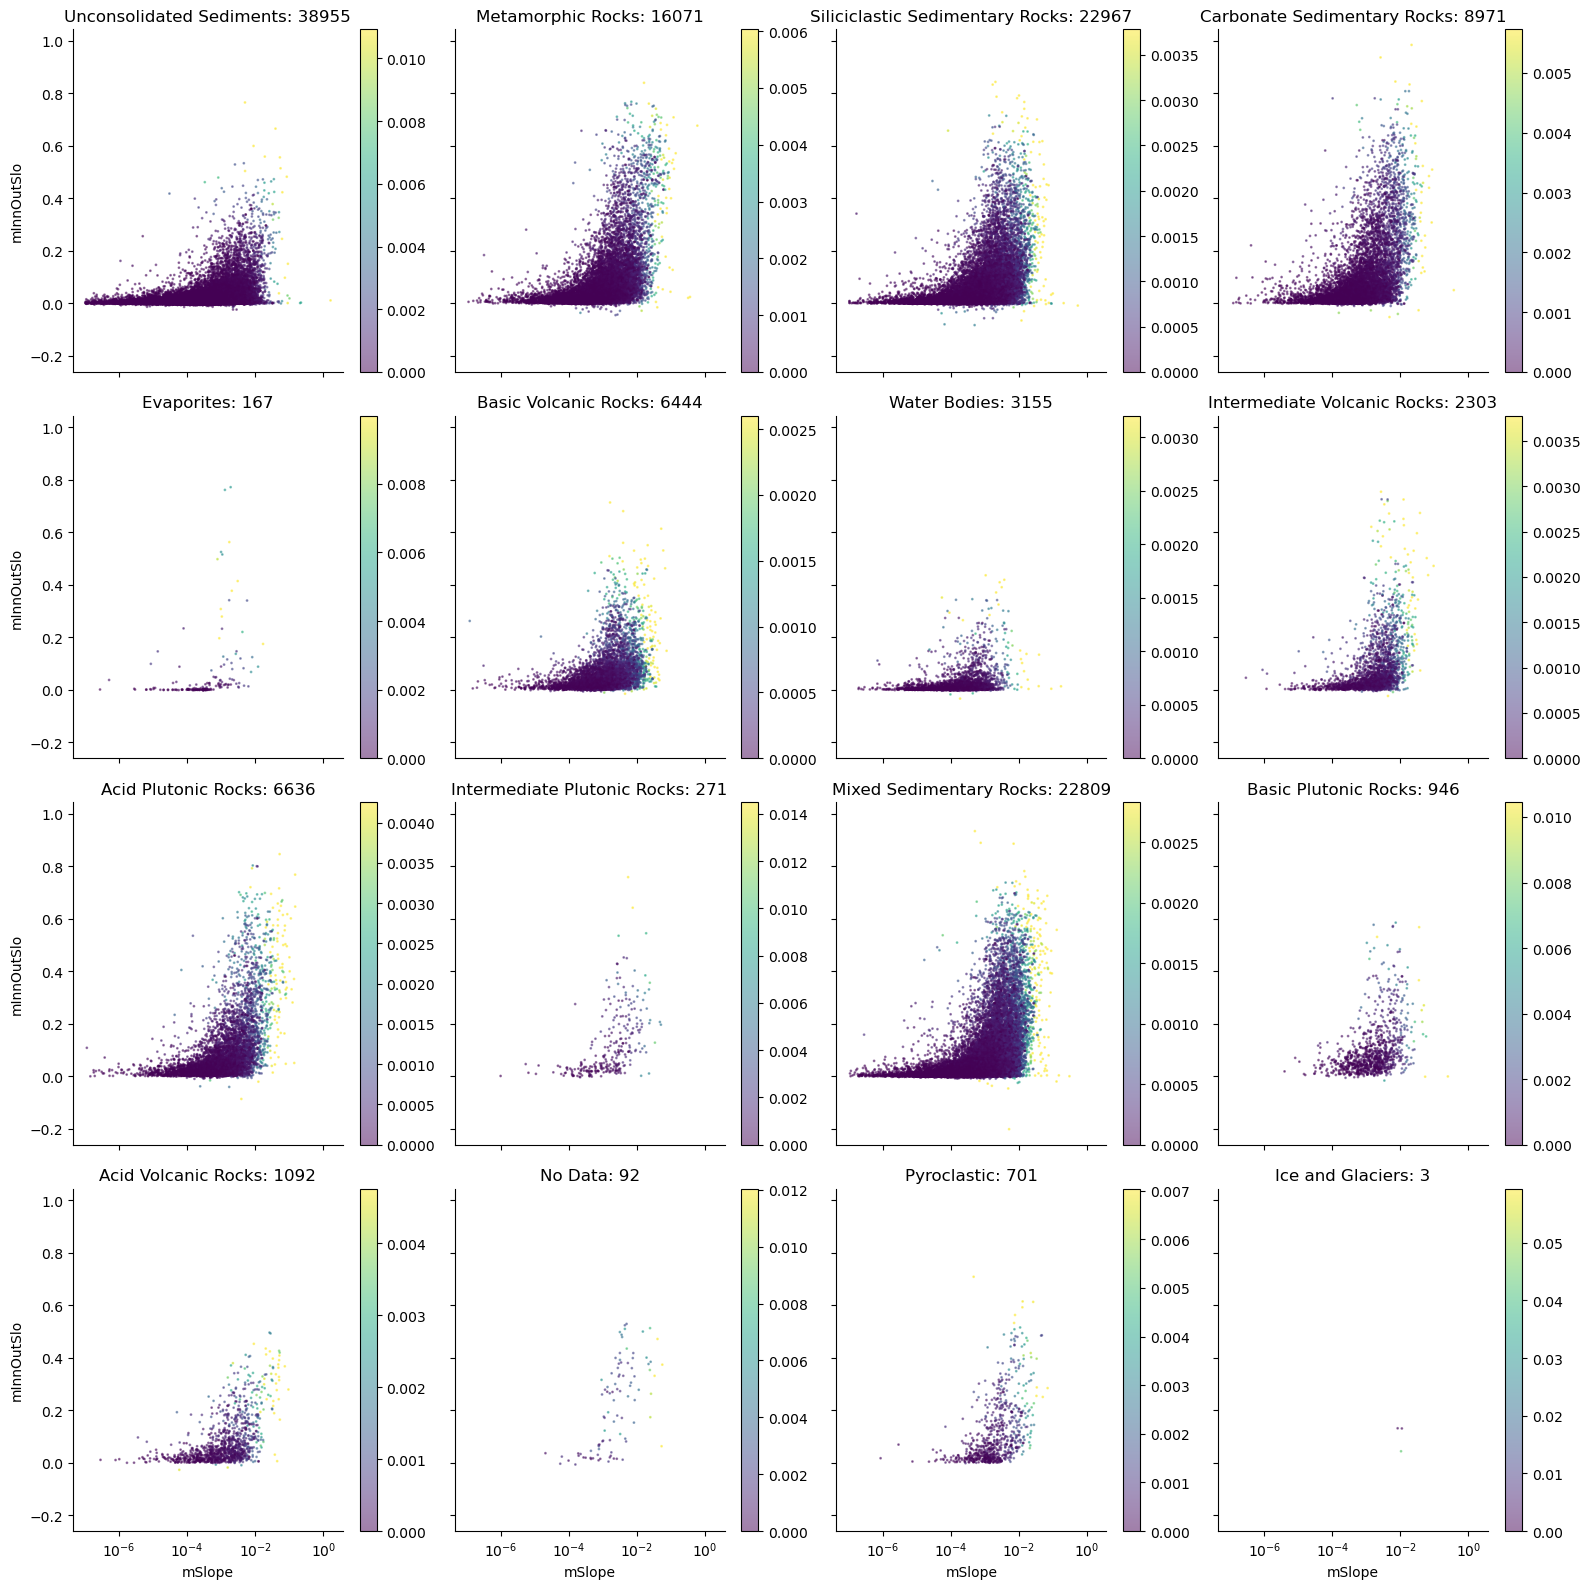

In [49]:
dfP = dfT.copy()
X = 'mSlope'
Y = 'mInnOutSlo'
dfP = dfP[(~dfP[X].isna()) & (~dfP[Y].isna()) & (dfP[X] > 0.0000001)]
# dfP = dfP[(~dfP[X].isna()) & (~dfP[Y].isna()) & (dfP[X] > 0.0000001) & (dfP.ER < 19)]
dfP = dfP.groupby('xx', group_keys=False).apply(lambda x: mean_dist_neighbors(x, [X, Y]))

g = sns.FacetGrid(dfP, col='xxFull', col_wrap=4, height=4)
# Map the custom scatter plot function onto the grid
g.map(scatter_with_color_limits, X, Y,'meanD', 'stdD', 'xxFull', 'countD')
plt.savefig(directory + f'results/figures/{X}_{Y}_litho.png')
plt.show()

### ER vs in out slope per lithology

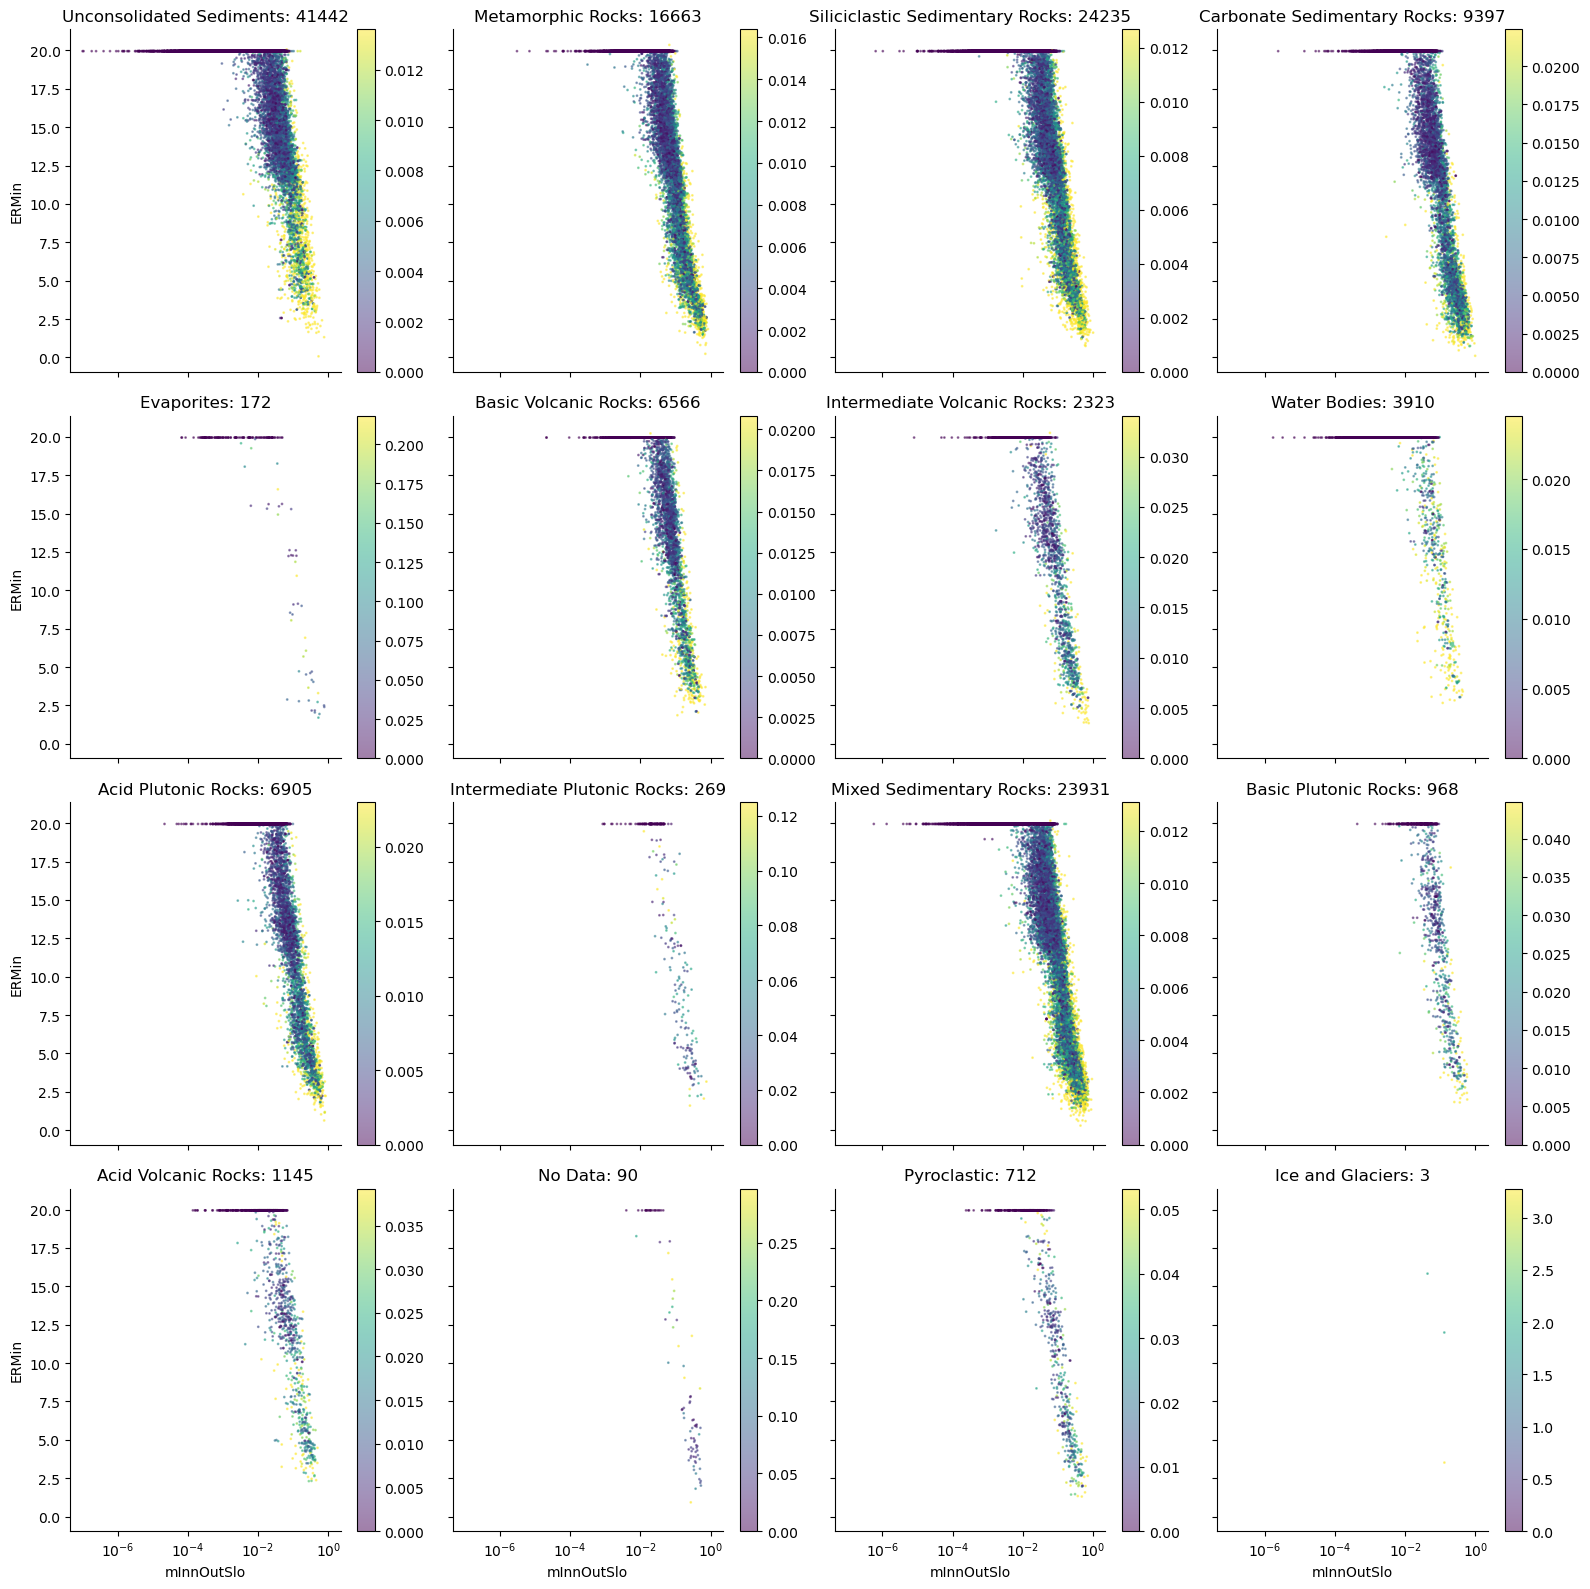

In [55]:
dfP = dfT.copy()
X = 'mInnOutSlo'
Y = 'ERMin'
dfP = dfP[(~dfP[X].isna()) & (~dfP[Y].isna()) & (dfP[X] > 0.0000001)]
# dfP = dfP[(~dfP[X].isna()) & (~dfP[Y].isna()) & (dfP[X] > 0.0000001) & (dfP.ER < 19)]
dfP = dfP.groupby('xx', group_keys=False).apply(lambda x: mean_dist_neighbors(x, [X, Y]))

g = sns.FacetGrid(dfP, col='xxFull', col_wrap=4, height=4)
# Map the custom scatter plot function onto the grid
g.map(scatter_with_color_limits, X, Y,'meanD', 'stdD', 'xxFull', 'countD')
plt.savefig(directory + f'results/figures/{X}_{Y}_litho.png')
plt.show()

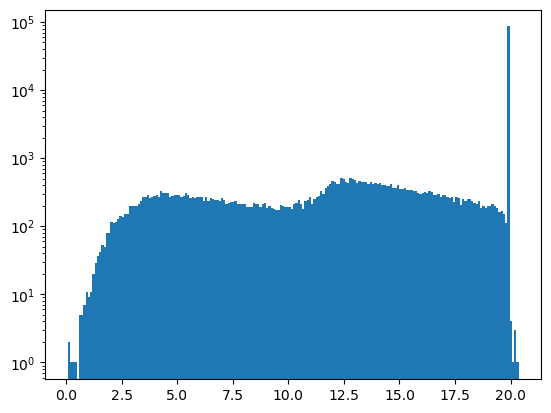

In [108]:
plt.hist(dfT[dfT.mSlope > 0.00000000005].ERMin, bins = 200)
plt.yscale('log')

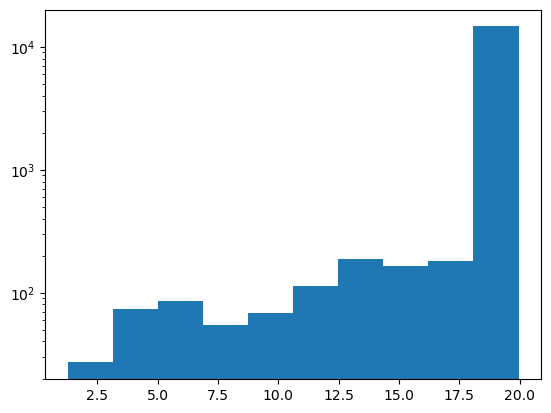

In [109]:
plt.hist(dfT[dfT.mSlope < 0.00000000005].ERMin)
plt.yscale('log')


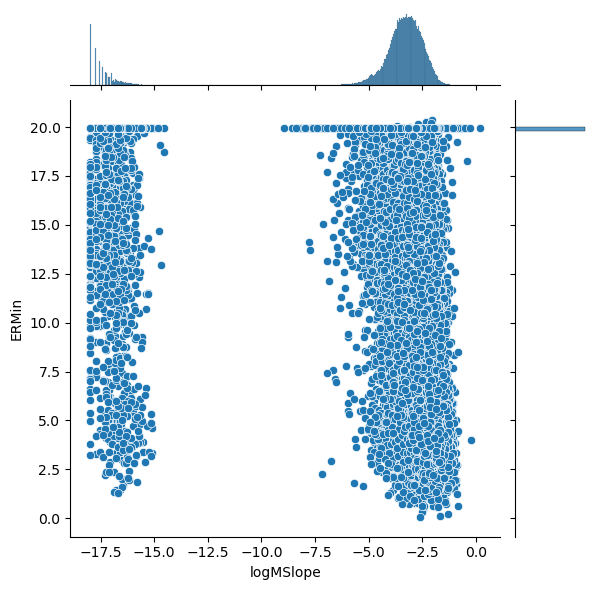

In [93]:
dfP = dfT.copy()
dfP = 

X = 'logMSlope'
Y = 'ERMin'
dfP[X] = np.log10(dfP.mSlope)

sns.jointplot(x=X, y=Y, data=dfP, kind="scatter")
plt.savefig(directory + f'results/figures/scatter_hist_{X}_{Y}.png')

# sns.lmplot(data = dfP, x = 'logMSlope', y = 'ERMin', fit_reg=True, logx = False, hue = 'xx')
# sns.lmplot(data = dfP, x = 'mSlope', y = 'ERMin', fit_reg=True, logx = True)
# plt.xscale('log')
# plt.ylim([0,20])

# sns.regplot(data=dfP, x="logMSlope", y="ERMin", order=2)

In [67]:
dfP = dfT.copy()
dfP = dfP[dfP.ER < 19.9]
Y = 'mSlope'
X = 'threshSlope'

dfP = dfP[(~dfP[Y].isna()) & (dfP.mSlope > 0.000000005)]

dfP['threshSlope'] =(1.2*0.05) / ((dfP['node_mwm']*(1/28)) * 1e3 * 9.8)

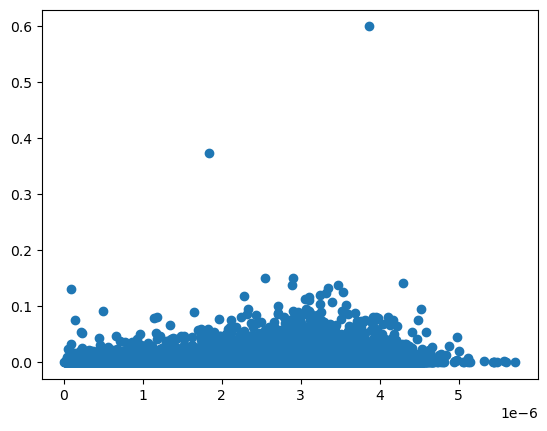

In [70]:
plt.scatter(dfP['threshSlope'], dfP.mSlope)

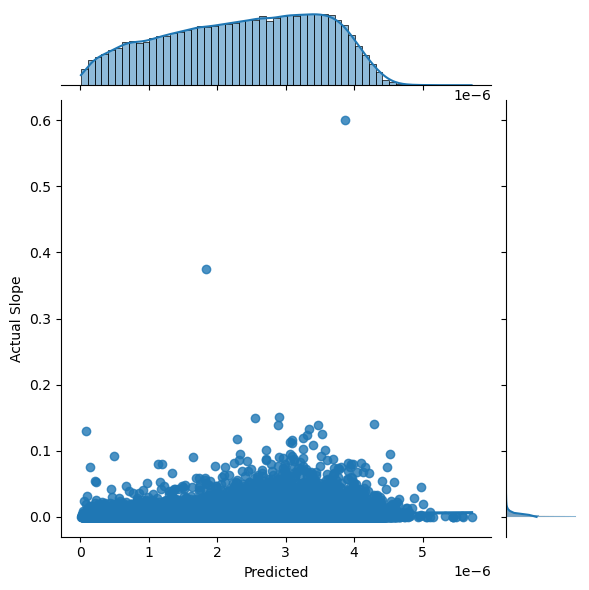

In [75]:
# plt.scatter(dfP['threshSlope'], dfP.mSlope)

Xnear = dfP[[X, Y]].values

nbrs = NearestNeighbors(n_neighbors= 100, algorithm='ball_tree').fit(Xnear)
distances, indices = nbrs.kneighbors(Xnear)
meanD = np.mean(distances, axis = 1)
stdD  = 3*np.std(meanD)


# plt.scatter(dfP[X], dfP[Y], alpha = 0.5, s =1, c = meanD, vmax = stdD, cmap = rb)
sns.jointplot(data = dfP, x = 'threshSlope', y = 'mSlope', kind = 'reg')
# plt.yscale('log')
# plt.xscale('log')
# plt.xlim([15**-4,0])
plt.ylabel('Actual Slope')
plt.xlabel('Predicted')
# plt.colorbar()
# plt.savefig(directory + f'results/figures/{X}_{Y}.png')
plt.show()

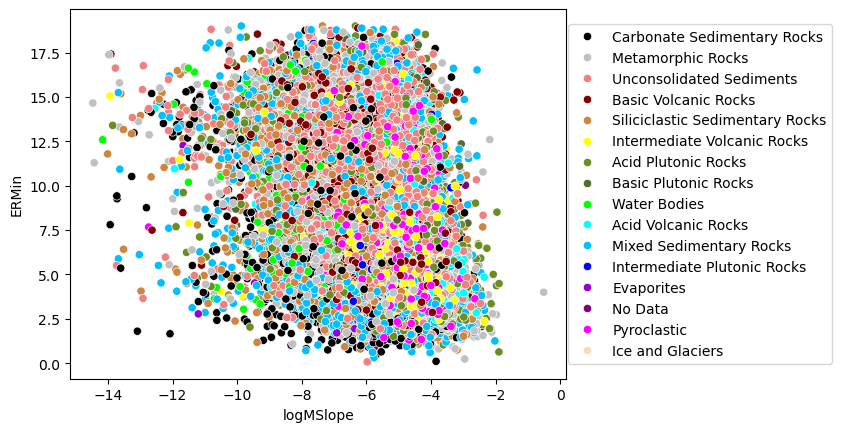

In [140]:
# plt.scatter(dfP['logMSlope'], dfP['ERMin'], c = dfP['xx'])
g = sns.scatterplot(data = dfP, x = 'logMSlope', y = 'ERMin', hue = 'xxFull')
g.legend(loc='right', bbox_to_anchor=(1.55, 0.5), ncol=1)
plt.show()

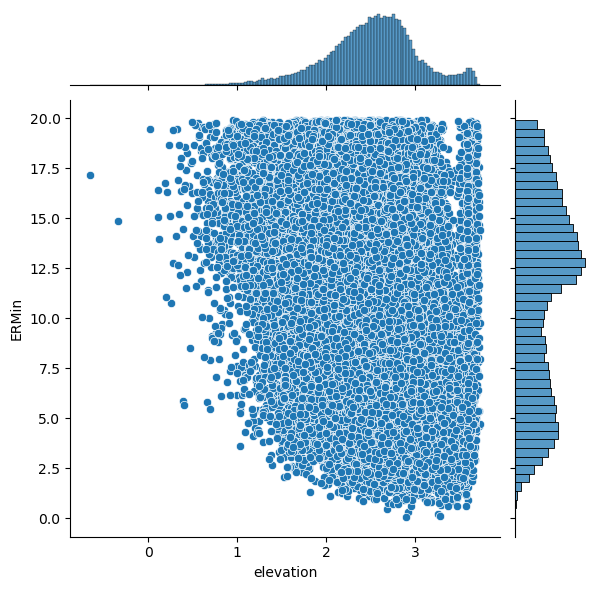

In [28]:
dfP = dfT.copy()
dfP = dfP[dfP['ERMin'] < 19.9]
dfP['elevation'] = np.log10(dfP.elevation)
X = 'elevation'
Y = 'ERMin'


sns.jointplot(x=X, y=Y, data=dfP, kind="scatter")
plt.savefig(directory + f'results/figures/scatter_hist_{X}_{Y}.png')

In [175]:
def zscore(df, X):
    x = df[X]

    return (x - np.mean(x)) / np.std(x)
dfP['ERMinNorm'] = zscore(dfP,'ERMin')
dfP['mSlopeNorm'] = zscore(dfP,'mSlope')

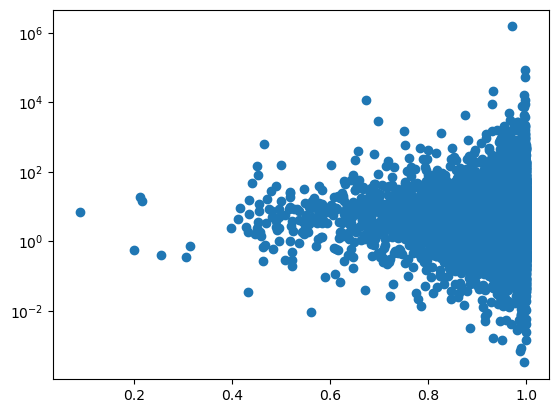

In [187]:
dfP = dfP[dfP['ERMin'] < 19.9]
hacks = dfP.dist_out / ((1.4*(dfP.facc*1e6)**0.4)+ dfP.dist_out)
dfP['Hacks'] = hacks
plt.scatter(dfP['Hacks'], dfP['ERMinNorm'] / dfP['mSlopeNorm'])
# plt.xscale('log')
plt.yscale('log')

(0.0, 0.005)

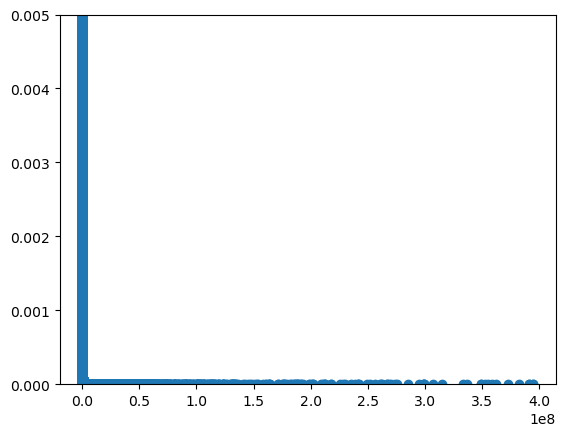

In [167]:
dfP = dfT.copy()
dfP = dfP[dfP.mSlope > 0.00000005]

dfP['ERSlopeRatio'] = dfP.ERMin / dfP.mSlope
plt.scatter(dfP['ERSlopeRatio'], dfP['mSlope'])
plt.ylim([0, 0.005])

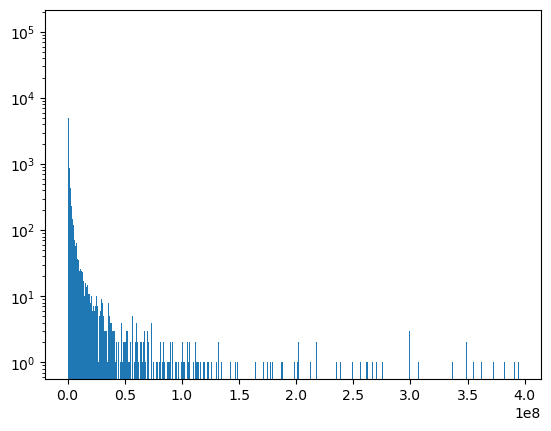

In [164]:
plt.hist(dfP.ERSlopeRatio, bins = 1000)
plt.yscale('log')
plt.show()

### Hack's Law

In [55]:
rb = create_custom_cmap('_', True)

dfP = dfT.copy()

hacks = dfP.dist_out / ((1.4*(dfP.facc*1e6)**0.4)+ dfP.dist_out)

dfP['maxDOut'] = dfP.groupby('File')['dist_out'].transform('max')
hacks = dfP.dist_out / dfP['maxDOut']
dfP['Hacks'] = hacks
X = 'Hacks'
Y = 'ERMin'
dfP = dfP[dfP[Y] < 29.9]

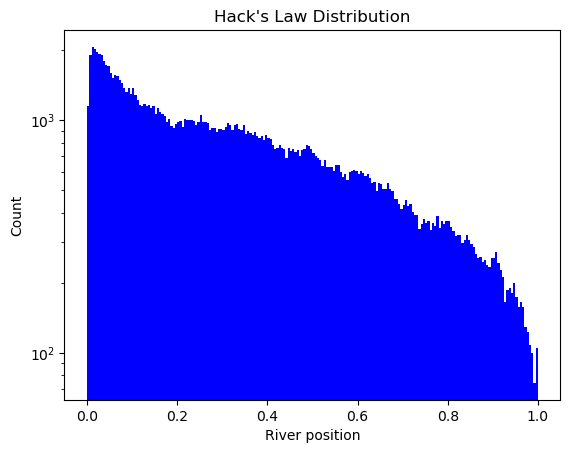

In [48]:
plt.hist(dfP.Hacks, bins = 200, color = 'blue')
plt.yscale('log')
plt.title("Hack's Law Distribution")
plt.xlabel('River position')
plt.ylabel('Count')
# plt.savefig(directory + 'results/figures/dist_hacks.png')
plt.show()

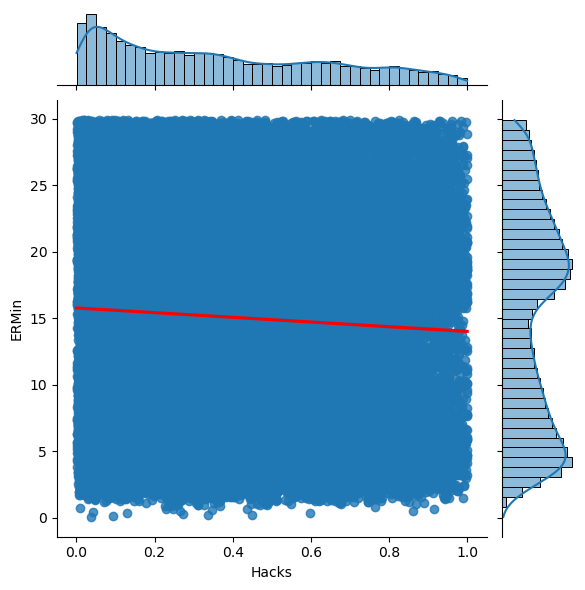

In [56]:


sns.jointplot(x='Hacks', y='ERMin', data=dfP, kind = 'reg', line_kws = {'zorder':100, 'color': 'red'})
# plt.savefig(directory + f'results/figures/Hanks_{X}_{Y}.png')
plt.xlabel('Hacks')
# plt.xscale('log')
# plt.yscale('log')
# plt.xlim()
# plt.xscale('log')
plt.show()

### ER vs Width

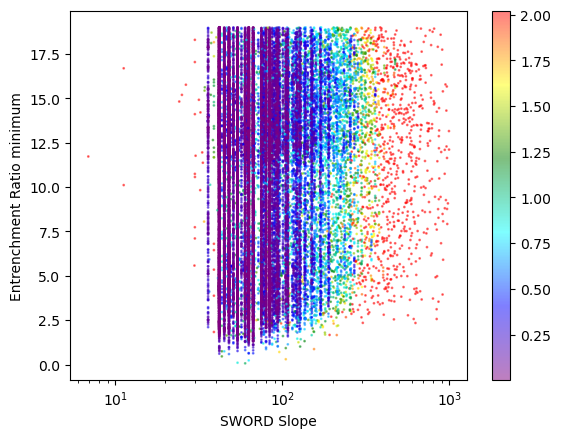

In [77]:
rb = create_custom_cmap('_', True)

dfP = dfT.copy()

X = 'width'
Y = 'ERMin'

# dfP = dfP[(~dfP[X].isna()) & (~dfP[Y].isna()) & (dfP.mSlope > 0.0000005)]
dfP = dfP[(~dfP[X].isna()) & (~dfP[Y].isna()) & (dfP.mSlope > 0.0000005) & (dfP[X] < 1e3) & (dfP[Y] < 19)]
Xnear = dfP[[X, Y]].values

nbrs = NearestNeighbors(n_neighbors= 10, algorithm='ball_tree').fit(Xnear)
distances, indices = nbrs.kneighbors(Xnear)
meanD = np.mean(distances, axis = 1)
stdD  = 3*np.std(meanD)


plt.scatter(dfP[X], dfP[Y], alpha = 0.5, s =1, c = meanD, vmax = stdD, cmap = rb)
# plt.yscale('log')
plt.xscale('log')

plt.ylabel('Entrenchment Ratio minimum')
plt.xlabel('SWORD Slope')
plt.colorbar()
plt.savefig(directory + f'results/figures/{X}_{Y}.png')
plt.show()

### Pairplot

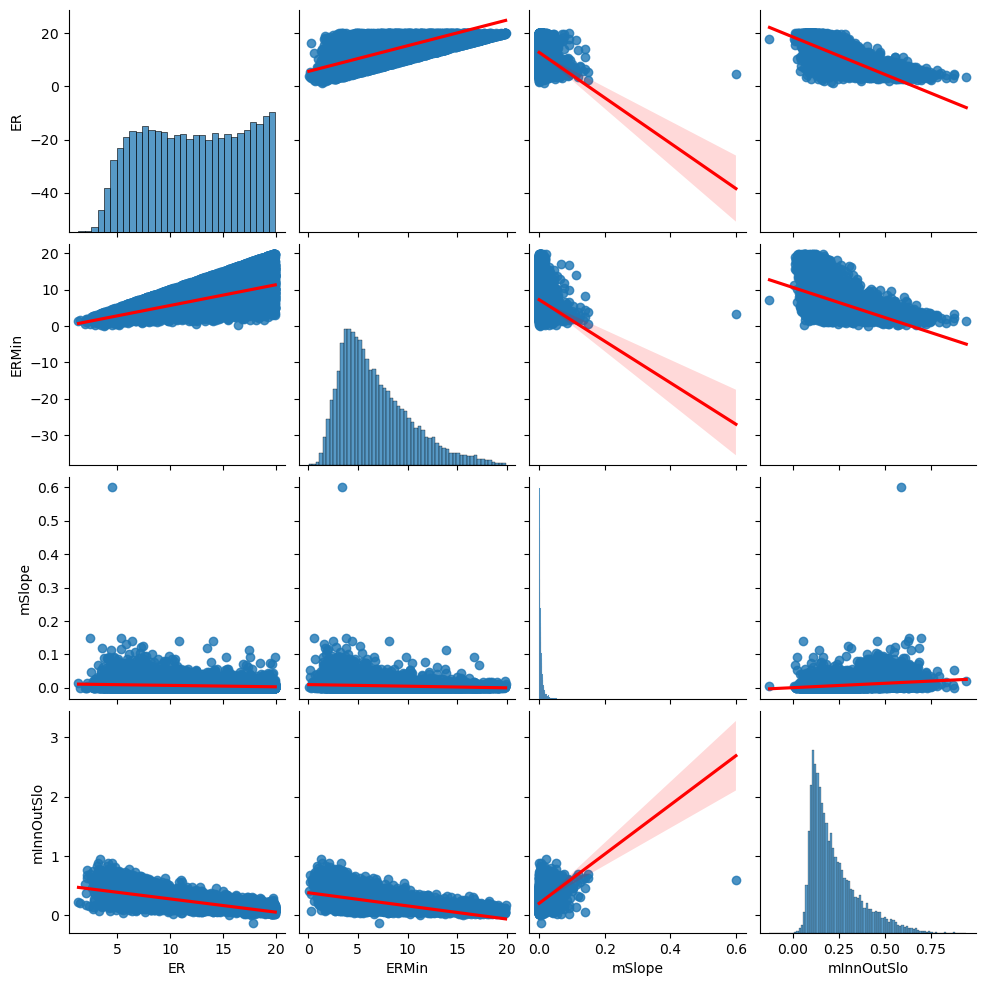

In [85]:
dfP = dfT.copy()
dfP = dfP[dfP['ER'] < 19.9]
dfP['logMSlope'] = np.log(dfP['mSlope'])
X = 'ER'
y = 'mSlope'
dfP = dfP[(~dfP[X].isna()) & (~dfP[Y].isna()) & (dfP.mSlope > 0.0000005)]

hacks = dfP.dist_out / ((1.4*(dfP.facc*1e6)**0.4)+ dfP.dist_out)
dfP['Hacks'] = hacks

dfP = dfP[['ER', 'ERMin', 'mSlope', 'mInnOutSlo']]

sns.pairplot(dfP, kind = 'reg', plot_kws={'line_kws':{'color':'red'}})
plt.savefig(directory +'results/figures/Pairplot.png')
plt.show()

# D

(array([ 20.,  53.,  90.,  81.,  82., 143., 144., 171., 152., 120.]),
 array([ 1.37970351,  4.23139081,  7.0830781 ,  9.9347654 , 12.7864527 ,
        15.63814   , 18.48982729, 21.34151459, 24.19320189, 27.04488918,
        29.89657648]),
 <BarContainer object of 10 artists>)

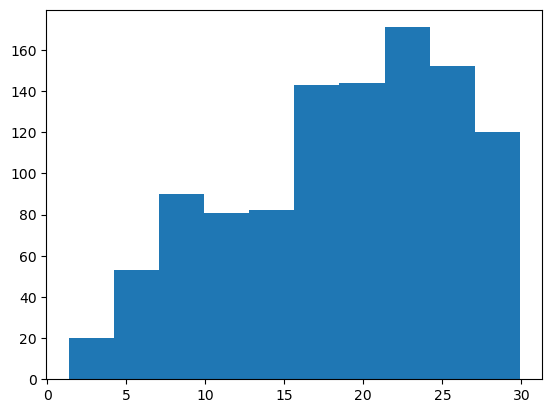

In [87]:
dfP = dfT.copy()
# dfP = dfP[dfP.xx == 'su']

dfP.loc[dfP.mSlope < 1e-10, 'mSlope'] = 0
# dfP = dfP[(dfP.mSlope < 0.8) & (dfP['ERMin'] < 29.9)]

dfP = dfP[(dfP['ER'] < 29.9)]


dfP['ERDelta'] = dfP['ERMax'] - dfP['ERMin']
dfP = dfP[dfP.ERDelta == 0]
plt.hist(dfP.ER)

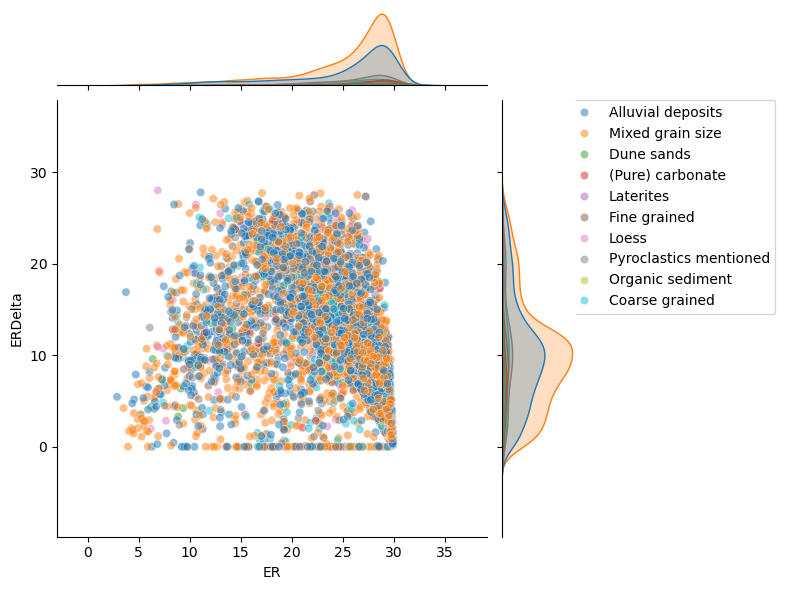

In [60]:
dfP = dfT.copy()
dfP = dfP[dfP.xx == 'su']

dfP.loc[dfP.mSlope < 1e-10, 'mSlope'] = 0
# dfP = dfP[(dfP.mSlope < 0.8) & (dfP['ERMin'] < 29.9)]

dfP = dfP[(dfP['ER'] < 29.9)]


dfP['ERDelta'] = dfP['ERMax'] - dfP['ERMin']

X = 'ER'
Y = 'ERDelta'


sns.jointplot(x = X, y = Y, hue = 'secondLong', data = dfP, alpha = 0.5)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.18, 1), loc=2, borderaxespad=0.)

In [14]:
totalOuter = (~dfT.moutSlope.isna()).sum()
totalInner = (~dfT.minnSlope.isna()).sum()


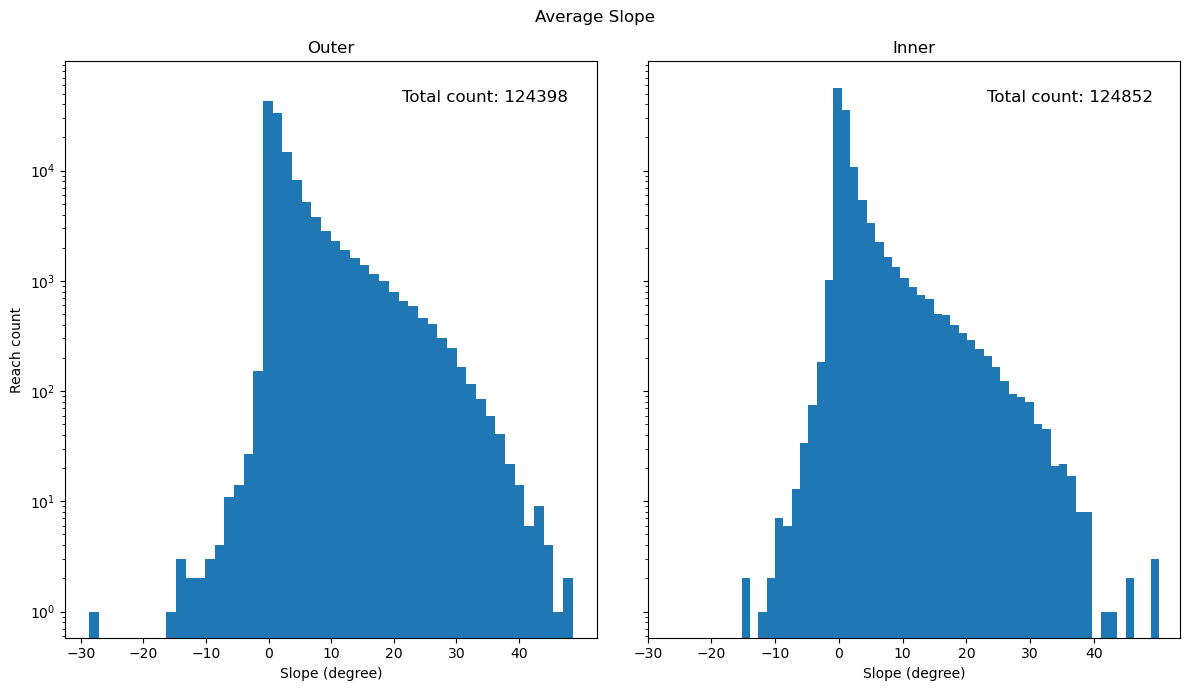

In [15]:
f, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(12,7), sharey=True)
ax[0].hist(np.rad2deg(np.arctan(dfT.moutSlope)), bins = 50)
ax[1].hist(np.rad2deg(np.arctan(dfT.minnSlope)), bins = 50)
ax[0].set_title('Outer')
ax[1].set_title('Inner')
ax[0].set_ylabel('Reach count')
ax[0].set_xticks(range(-30, 50, 10))
ax[1].set_xticks(range(-30, 50, 10))
ax[0].set_xlabel('Slope (degree)')
ax[1].set_xlabel('Slope (degree)')
f.suptitle('Average Slope')
ax[0].set_yscale('log')
ax[1].set_yscale('log')

ax[0].text(-0.15, 0.95, f'Total count: {totalOuter}', 
         transform=plt.gca().transAxes, 
         ha='right', va='top', 
         fontsize=12, color='black')

ax[1].text(0.95, 0.95, f'Total count: {totalInner}', 
         transform=plt.gca().transAxes, 
         ha='right', va='top', 
         fontsize=12, color='black')


plt.tight_layout()
plt.show()


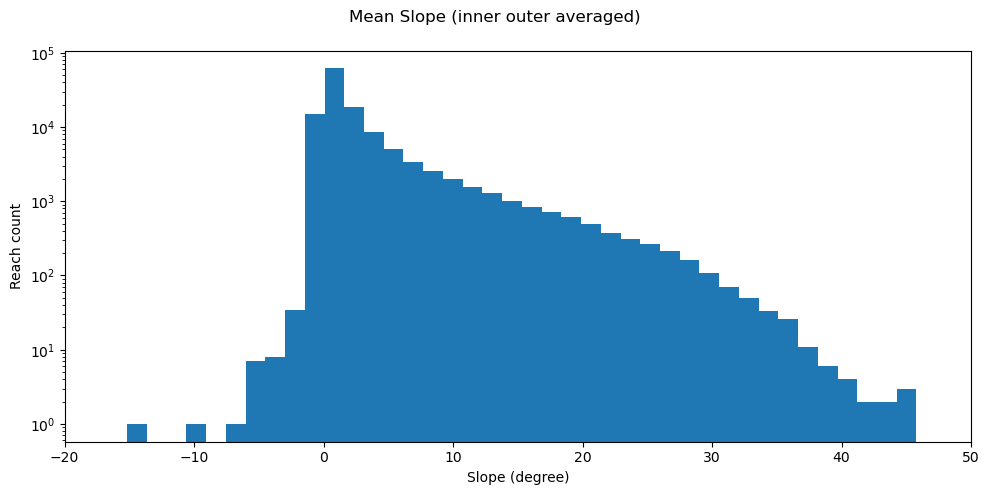

In [26]:
f, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(10,5), sharey=True)
ax.hist(np.rad2deg(np.arctan(dfT.mInnOutSlo)), bins = 40)

ax.set_ylabel('Reach count')
ax.set_xticks(range(-20, 60, 10))
ax.set_xlabel('Slope (degree)')
f.suptitle('Mean Slope (inner outer averaged)')
ax.set_yscale('log')
plt.tight_layout()
plt.show()

In [28]:
dfT.mInnOutSlo.max()

1.027637130440886

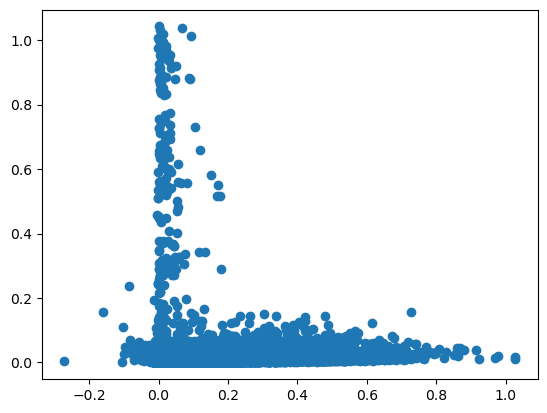

In [29]:
# remove wrong LineSlope values
dfScatter = dfT.copy()
dfScatter = dfScatter[dfScatter.lineSlope < 1.05]
plt.scatter( dfScatter.mInnOutSlo,dfScatter.lineSlope)

In [ ]:
for index, row in dfT.iterrows():
    if isinstance(row.outPR, float) == False:
        dfT.loc[index, 'outPRange'] = row.outPR.max() - row.outPR.min()
    if isinstance(row.innPR, float) == False:
        dfT.loc[index, 'innPRange'] = row.innPR.max() - row.innPR.min()

AttributeError: 'str' object has no attribute 'max'

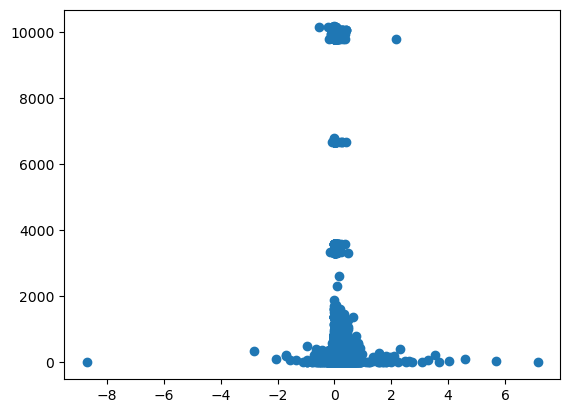

In [ ]:
T = dfT[dfT.outPRange > 0]

plt.scatter(T.moutSlope, T.outPRange)
# plt.yscale('log')

In [8]:
T = dfT[dfT.innPRange > 0]

plt.scatter(T.minnSlope, T.innPRange)
plt.yscale('log')

NameError: name 'dfT' is not defined

# Check NaN values inflection and confinement

In [ ]:
F = dfT.File.unique()
print(f'Total inf missing: {dfT[(dfT.sin10_2.isna())].shape[0]}')
for i in range(len(F)):
    DF = dfT[dfT.File == F[i]]
    D = DF[(DF.sin10_2.isna())]
    print(D.shape[0], F[i])
    if i == 0:
        df_emptyInf = D
    else:
        df_emptyInf = pd.concat([df_emptyInf, D])

Total inf missing: 1889
10 af_11
38 af_12
34 af_13
45 af_14
1 af_15
2 af_16
15 af_17
6 af_18
21 as_31
13 as_32
22 as_33
11 as_34
34 as_35
0 as_36
34 as_41
43 as_42
369 as_43
66 as_44
282 as_45
12 as_46
0 as_47
3 as_48
2 as_49
13 eu_21
60 eu_22
43 eu_23
25 eu_24
17 eu_25
11 eu_26
0 eu_27
23 eu_28
1 eu_29
45 na_71
51 na_72
31 na_73
54 na_74
15 na_75
1 na_76
11 na_77
13 na_78
16 na_81
8 na_82
33 na_83
0 na_84
6 na_85
0 na_86
1 na_91
9 oc_51
21 oc_52
15 oc_53
0 oc_55
20 oc_56
5 oc_57
41 sa_61
113 sa_62
33 sa_63
68 sa_64
7 sa_65
11 sa_66
5 sa_67


In [ ]:
dfT[dfT.apexP10_2.isna()].shape[0]

1889

In [ ]:
F = dfT.File.unique()
Total = dfT[(dfT.outSlope.isna()) & (dfT.innSlope.isna()) & (dfT.sin10_2.isna() == False)].shape[0]
print(f'Total Na values: {Total}')
C = 0
for i in range(len(F)):
    DF = dfT[dfT.File == F[i]]
    D = DF[(DF.outSlope.isna()) & (DF.innSlope.isna()) & (DF.sin10_2.isna() == False)]
    print(D.shape[0], F[i])
    C += D.shape[0]

df_emptyConf = dfT[(dfT.outSlope.isna()) & (dfT.innSlope.isna()) & (dfT.sin10_2.isna() == False)]
print(df_emptyConf.shape[0])

Total Na values: 6537
48 af_11
49 af_12
169 af_13
65 af_14
9 af_15
21 af_16
21 af_17
70 af_18
471 as_31
102 as_32
73 as_33
122 as_34
691 as_35
6 as_36
14 as_41
152 as_42
203 as_43
197 as_44
146 as_45
37 as_46
0 as_47
17 as_48
2 as_49
9 eu_21
95 eu_22
17 eu_23
16 eu_24
7 eu_25
32 eu_26
2 eu_27
115 eu_28
13 eu_29
33 na_71
29 na_72
42 na_73
142 na_74
75 na_75
7 na_76
25 na_77
14 na_78
93 na_81
40 na_82
6 na_83
0 na_84
1 na_85
0 na_86
0 na_91
105 oc_51
182 oc_52
218 oc_53
4 oc_55
119 oc_56
4 oc_57
334 sa_61
1611 sa_62
92 sa_63
321 sa_64
12 sa_65
9 sa_66
28 sa_67
6537


# Topologie 

In [143]:
import networkx as nx

## Topologie Amazone

In [144]:
dfC = gpd.read_file(glob.glob(directory +'input/SWOT_vector/*sa*62*.shp')[0])

In [145]:
F = sourceFiles[54]
# F = glob.glob(directory + 'results/new_segments/vector/*sa*62*.shp')[0]
dfTop = gpd.read_file(F)

dfC = gpd.read_file(glob.glob(directory +'results/cycles/sa_62*.shp')[1])

In [146]:
dfNode = dfC.copy()
df     = dfTop.copy()
# get edges based on grouped reach_ids
grouped = dfNode.groupby('reach_id')
# Get the indices of all rows that belong to each group
edges_3 = [tuple(group_df.node_id.tolist()) for group, group_df in grouped if len(group_df.node_id.tolist()) > 2]
edges_2 = [tuple(group_df.node_id.tolist()) for group, group_df in grouped if 
        (len(group_df.node_id.tolist()) > 1) &
        (len(group_df.node_id.tolist()) < 3)]

# print(df[df.reach_id == 62100100015])
for i in range(len(edges_3)):
    dfEdgeMany   = dfNode[dfNode.node_id.isin(edges_3[i])]
    mainReachId  = dfEdgeMany.reach_id.value_counts().keys()[0]
    # print(i)
    # print(mainReachId, type(mainReachId))
    # print(df[df.reach_id == mainReachId])
    # print(df)
    mainReach    = df[df.reach_id == int(mainReachId)].iloc[0]

    nodeRows = dfEdgeMany[dfEdgeMany.node_id.duplicated(keep = 'first') == False]
    dists = np.zeros(nodeRows.shape[0])
    for j in range(nodeRows.shape[0]):
        dists[j] = mainReach.geometry.project(nodeRows.iloc[j].geometry)

    sortedNodeIds = nodeRows.node_id.unique()[np.argsort(dists)]
    edgesMany     = [(sortedNodeIds[I], sortedNodeIds[I+1]) for I in range(len(sortedNodeIds) -1)]

    edges_2.extend(edgesMany)




G = nx.Graph()
G.add_edges_from(edges_2)

In [147]:
S = '11992'
T = '1211'
# S = '14860'
# T = '14546'
hp = nx.has_path(G, source =S, target = T)
print(hp)
if hp == True:
    paths = []
    for i, path in enumerate(nx.shortest_simple_paths(G, source =S, target =T)):

        paths.append(path)
        # print(path)
        # print(i)
        if i > 10:
            break
    paths[0]
amazoneRiver = dfNode[dfNode.node_id.isin(paths[0])].reach_id.unique()
for i, r in enumerate(amazoneRiver):
    amazoneRiver[i] = int(r)

True


In [16]:
amazoneRiver

array([62235100021, 62235100041, 62235100031, 62235200011, 62235100401,
       62235500021, 62235500031, 62235700011, 62235700061, 62235700021,
       62235900121, 62235900131, 62235900011, 62235900041, 62235900031,
       62235900061, 62235900071, 62235900081, 62236100011, 62237000011,
       62237000021, 62237000031, 62237000041, 62237000051, 62237000131,
       62238000011, 62239000011, 62238000021, 62251000171, 62251000111,
       62251000121, 62251000181, 62251000031, 62251000011, 62251000141,
       62251000041, 62251000021, 62251000061, 62251000071, 62251000091,
       62251000081, 62251000101, 62251000131, 62253000011, 62252100011,
       62253000021, 62253000031, 62253000041, 62253000061, 62253000081,
       62253000071, 62253000091, 62253000101, 62253000111, 62253000131,
       62253000141, 62253000161, 62253000151, 62253000171, 62255000473,
       62255000481, 62255000201, 62255000491, 62255000021, 62255000121,
       62254300041, 62254300051, 62255000231, 62254300061, 62254

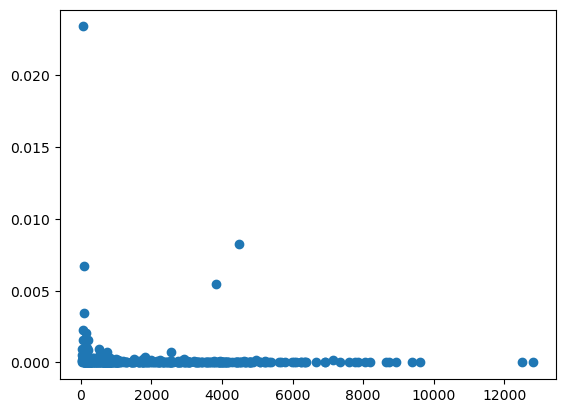

In [14]:
dfP = dfT.copy()
dfP = dfP[dfP.reach_id.isin(amazoneRiver)]

plt.scatter(dfP.width, dfP.mSlope)

In [152]:
dfER

Unnamed: 0     reach_id         ER           VW          BW  \
0                 0  11410000021  29.925000  3584.587500  119.785714   
1                 1  11410000021  29.925000  3174.187500  106.071429   
2                 2  11410000021  29.925000  3230.539773  107.954545   
3                 3  11410000021  29.925000  3293.887500  110.071429   
4                 4  11410000021  29.925000  3168.725000  105.888889   
...             ...          ...        ...          ...         ...   
2991321        9142  67209600121   6.386464   283.036467   44.318182   
2991322        9143  67209600121   4.450351   194.257810   43.650000   
2991323        9144  67209600121   7.285321   316.911454   43.500000   
2991324        9145  67209600121   2.524628   102.720807   40.687500   
2991325        9146  67209600121   2.868137   116.876597   40.750000   

            ERSide1     ERSide2   ERSS   File   mSlope  
0               NaN         NaN    NaN  af_11  0.00000  
1               NaN         NaN    NaN  af_11  0.00000  
2               NaN         NaN    NaN  af_11  0.00000  
3               NaN         NaN    NaN  af_11  0.00000  
4               NaN         NaN    NaN  af_11  0.00000  
...             ...         ...    ...    ...      ...  
2991321   22.159091  260.877376  False  sa_67  0.00176  
2991322  172.432810   21.825000  False  sa_67  0.00176  
2991323   21.750000  295.161454  False  sa_67  0.00176  
2991324   82.377057   20.343750  False  sa_67  0.00176  
2991325   71.453444   45.423154  False  sa_67  0.00176  

[2991326 rows x 10 columns]

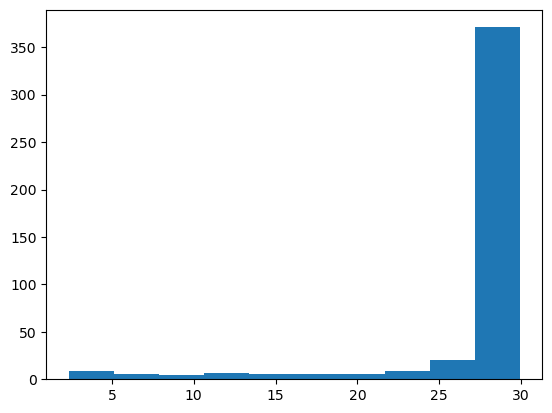

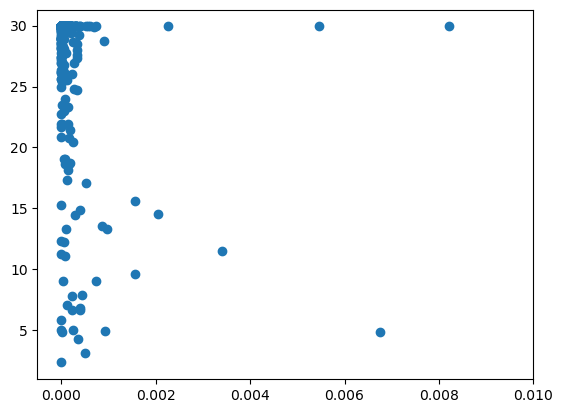

In [158]:
dfP = dfT.copy()
dfP = dfP[dfP.reach_id.isin(amazoneRiver)]

plt.hist(dfP.ER)
plt.show()

# plt.hist(dfP[dfP.ERSS == False].ER)
# plt.show()

plt.scatter(dfP.mSlope, dfP.ER)
plt.xlim([-0.0005,0.01])

plt.show()

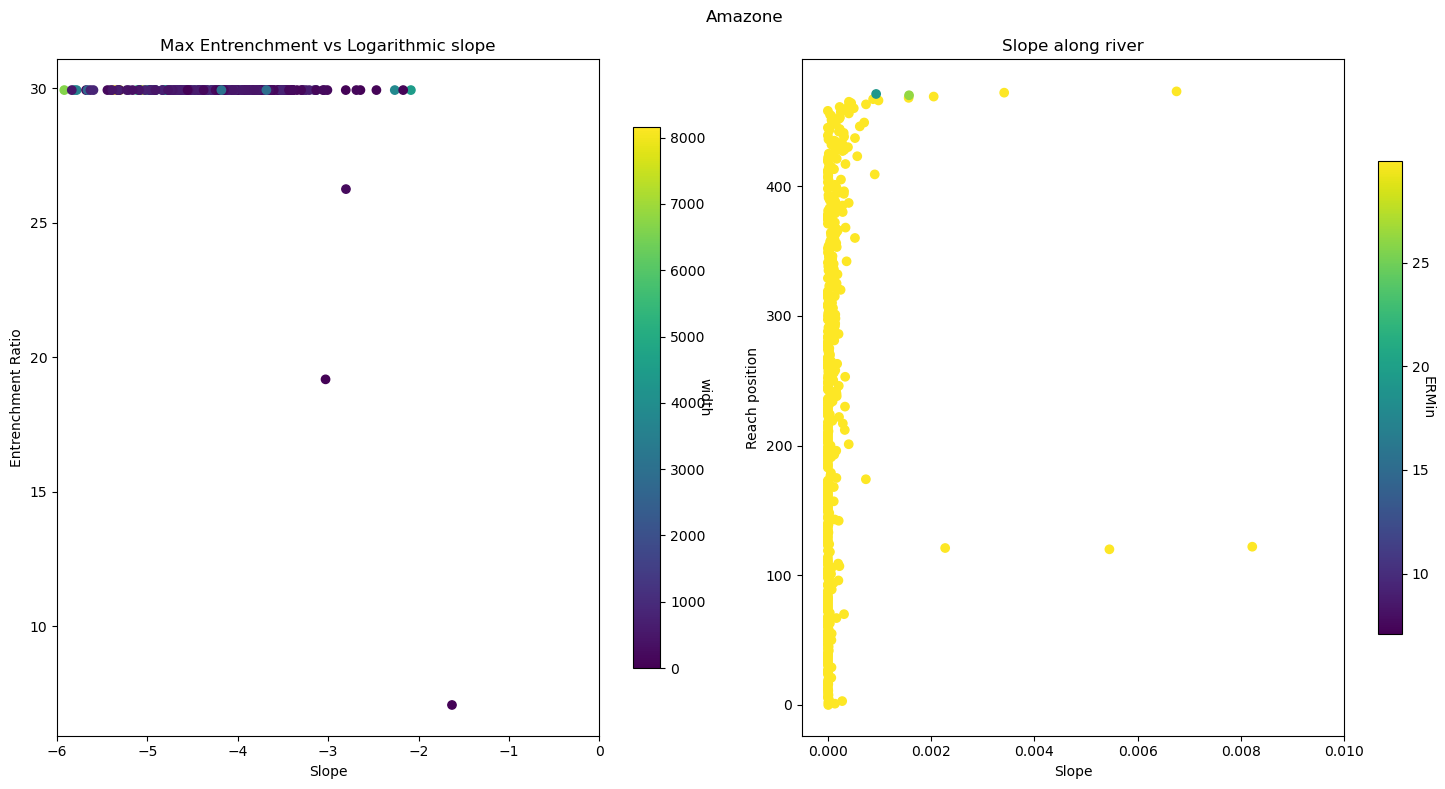

In [178]:
dfP = dfT.copy()
dfP = dfP[dfP.reach_id.isin(amazoneRiver)]

dfP['logSlope'] = np.log10(dfP['mSlope'])

dfRiver = pd.DataFrame({'id':np.arange(0,len(amazoneRiver)),'reach_id':amazoneRiver})
dfP = dfP.merge(dfRiver, how = 'left', left_on = 'reach_id', right_on = 'reach_id')

vmin = dfP.width.mean() - dfP.width.std() * 3
if vmin < 0:
    vmin = 0
vmax = dfP.width.mean() + dfP.width.std() * 3
f, ax =  plt.subplots(nrows = 1, ncols = 2, figsize = [15,8])
z1 = ax[0].scatter(dfP['logSlope'], dfP['ERMin'], c = dfP['width'], vmin = vmin, vmax = vmax)
ax[0].set_xlim([-6,0])
# ax[0].set_ylim([0,10])


cbar = plt.colorbar(z1, ax = ax[0],shrink=0.8)
cbar.set_label('width', rotation=270)
ax[0].set_ylabel('Entrenchment Ratio')
ax[0].set_xlabel('Slope')
ax[0].set_title('Max Entrenchment vs Logarithmic slope')

z1 = ax[1].scatter(dfP['mSlope'], dfP['id'], c = dfP['ERMin'])
ax[1].set_xlim([-0.0005,0.01])
cbar = plt.colorbar(z1, ax = ax[1],shrink=0.7)
cbar.set_label('ERMin', rotation=270)

ax[1].set_xlabel('Slope')
ax[1].set_ylabel('Reach position')
ax[1].set_title('Slope along river')


f.suptitle('Amazone')
plt.tight_layout()
plt.show()

## Topologie BrahmaPutra

In [49]:
F = sourceFiles[18]
F = glob.glob(directory + 'results/new_segments/vector/*as*45*.shp')[0]
dfTop = gpd.read_file(F)

In [50]:
reach_range = 50

# R = dfTop[dfTop.reach_id == 45253000071].iloc[0]
# river = []
# for i in range(reach_range):
#     rup = R.rch_id_up

#     if isinstance(rup, str):
#         if len(rup) > 11:
#             rup = '[' + re.sub("\s+", ",", rup.strip()) + ']'
#             for r in eval(rup):
#                 rupint = r
#         else:
#             rupint = eval(rup)
        
#         river.append(rupint)
#     else:
#         print('break')
#         break

#     R = dfTop[dfTop.reach_id == rupint].iloc[0]


river = []
for j in [45253000071, 45253000161, 45255001281, 45255001291, 45255001301, 45255000691, 45270000281,
          45270000511, 45280100251, 45291000011, 45292000011, 45292000171, 45292000481]:
    R = dfTop[dfTop.reach_id == j].iloc[0]
    river.append(R.reach_id)
    for i in range(50):
        rup = R.single_up
        # print(rup)
        if isinstance(rup, float):

            if np.isnan(rup) == False:
                rupint = int(rup)
                river.append(rupint)
            else:
                print('break')
                break
        else:
            print('break')
            break
        R = dfTop[dfTop.reach_id == rupint].iloc[0]
# river

break
break
break
break
break
break
break
break
break
break
break
break
break


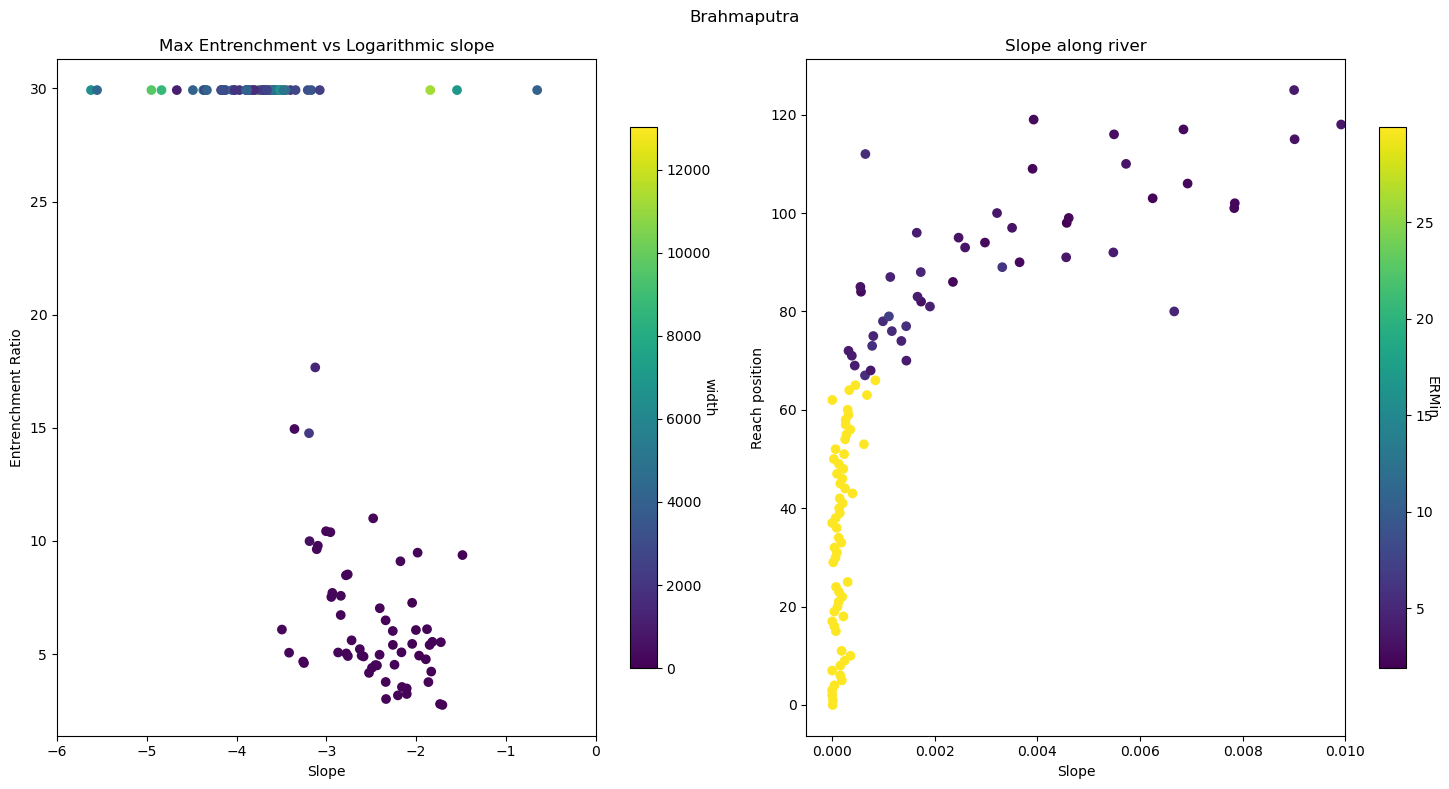

In [51]:
dfP = dfT.copy()
dfP = dfP[dfP.reach_id.isin(river)]

dfP['logSlope'] = np.log10(dfP['mSlope'])

dfRiver = pd.DataFrame({'id':np.arange(0,len(river)),'reach_id':river})
dfP = dfP.merge(dfRiver, how = 'left', left_on = 'reach_id', right_on = 'reach_id')

f, ax =  plt.subplots(nrows = 1, ncols = 2, figsize = [15,8])

vmin = dfP.width.mean() - dfP.width.std() * 3
if vmin < 0:
    vmin = 0
vmax = dfP.width.mean() + dfP.width.std() * 3
z1 = ax[0].scatter(dfP['logSlope'], dfP['ER'], c = dfP['width'], vmin = vmin, vmax = vmax)
ax[0].set_xlim([-6,0])
# ax[0].set_ylim([0,10])
cbar = plt.colorbar(z1, ax = ax[0],shrink=0.8)
cbar.set_label('width', rotation=270)
ax[0].set_ylabel('Entrenchment Ratio')
ax[0].set_xlabel('Slope')
ax[0].set_title('Max Entrenchment vs Logarithmic slope')

z1 = ax[1].scatter(dfP['mSlope'], dfP['id'], c = dfP['ERMin'])
ax[1].set_xlim([-0.0005,0.01])
cbar = plt.colorbar(z1, ax = ax[1],shrink=0.8)
cbar.set_label('ERMin', rotation=270)

ax[1].set_xlabel('Slope')
ax[1].set_ylabel('Reach position')
ax[1].set_title('Slope along river')


f.suptitle('Brahmaputra')
plt.tight_layout()
plt.show()

## Topologie Rhine

In [58]:
F = glob.glob(directory + 'results/new_segments/vector/*eu*23*.shp')[0]
dfTop = gpd.read_file(F)

In [59]:
Rhine = dfTop[(dfTop.river_name.isin(['Rhine', 'Rhein', 'Rhine; Ruhr', 'Rein Anteriur', 'Ill; Rhein; Rhine', 'Main; Rhine',
                                      'Lahn; Rhine', 'Engelsgraben; Rhine', 'Kleine Emscher', 'Rhine; Thur'])) |
              (dfTop.reach_id == 23269000011)]

rhineReaches = Rhine.reach_id.values
rhineReaches = np.sort(rhineReaches)

In [60]:
# dfP[dfP.dist_out < 0.6e6].sort_values('ERMin')
# dfP[(dfP.dist_out < 0.6e6) & (dfP.ERMin < 28)].reach_id.values

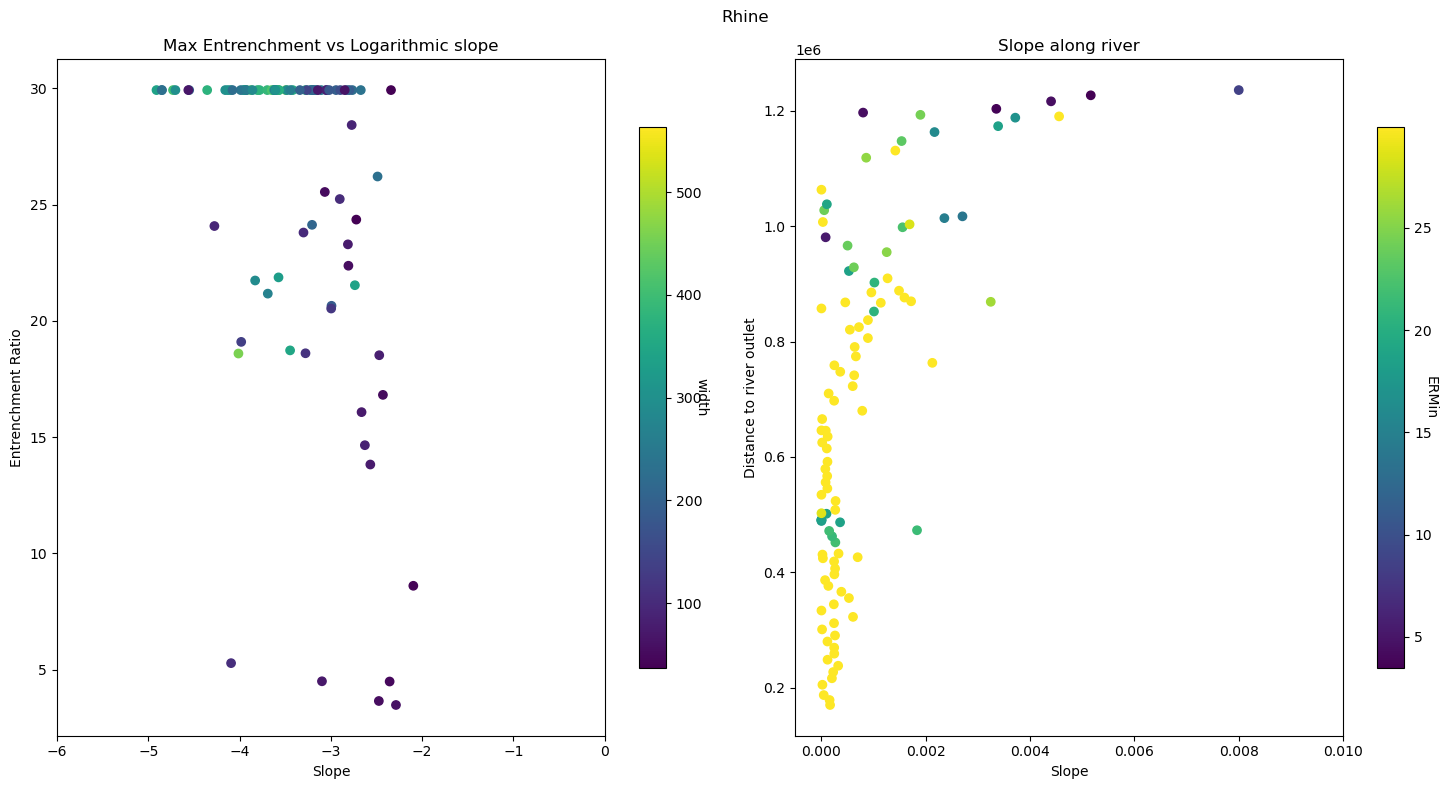

In [61]:
dfP = dfT.copy()
dfP = dfP[dfP.reach_id.isin(rhineReaches)]

dfP['logSlope'] = np.log10(dfP['mSlope'])

dfRiver = pd.DataFrame({'id':np.arange(0,len(rhineReaches)),'reach_id':rhineReaches})
dfP = dfP.merge(dfRiver, how = 'left', left_on = 'reach_id', right_on = 'reach_id')

f, ax =  plt.subplots(nrows = 1, ncols = 2, figsize = [15,8])
z1 = ax[0].scatter(dfP['logSlope'], dfP['ERMin'], c = dfP['width'])
ax[0].set_xlim([-6,0])
# ax[0].set_ylim([0,10])
cbar = plt.colorbar(z1, ax = ax[0],shrink=0.8)
cbar.set_label('width', rotation=270)
ax[0].set_ylabel('Entrenchment Ratio')
ax[0].set_xlabel('Slope')
ax[0].set_title('Max Entrenchment vs Logarithmic slope')

z1 = ax[1].scatter(dfP['mSlope'], dfP['dist_out'], c = dfP['ERMin'])
ax[1].set_xlim([-0.0005,0.01])
cbar = plt.colorbar(z1, ax = ax[1],shrink=0.8)
cbar.set_label('ERMin', rotation=270)

ax[1].set_xlabel('Slope')
ax[1].set_ylabel('Distance to river outlet')
ax[1].set_title('Slope along river')


f.suptitle('Rhine')
plt.tight_layout()
plt.show()